# Data Mining and Decision Systems 600092 - Code

Lachlan Gourlay - 201700039


# Install Table of contents
If you run the cell below to install and enable the table of contents, you should then be able to close the notebook and reopen with a lovely easy to use table of contents :)

The section numbers in the report match with the numbers generated by the table of contents package.

In [1]:
#These lines should install the table of contents addon for jupyter notebook
#https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html

!pip install jupyter_contrib_nbextensions
!pip install jupyter_nbextensions_configurator
!jupyter nbextensions_configurator enable --user
!jupyter nbextension enable toc2/main

#If this doesnt work sometimes you need to go into the tab "nbextensions" at the top of jupyter and manually enable TOC

You should consider upgrading via the 'c:\users\lachl\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\lachl\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
Enabling: jupyter_nbextensions_configurator
- Writing config: C:\Users\lachl\.jupyter
    - Validating...
      jupyter_nbextensions_configurator 0.4.1 ok
Enabling notebook nbextension nbextensions_configurator/config_menu/main...
Enabling tree nbextension nbextensions_configurator/tree_tab/main...
Enabling notebook extension toc2/main...
      - Validating: problems found:
        - require?  X toc2/main


# Import
Import libraries   

In [2]:
#%matplotlib inline 
import pandas as pd # Common aliased imports.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import sklearn
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import scikitplot as skplt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean as meanFunc
from numpy import std
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# Read in the data

In [3]:
#Read in the data and set the relevant datatypes
df = pd.read_csv('../2020-DMDS-ACWData_fixed.csv', dtype={'Indication':'category', 'Diabetes':'category', 'IHD':'category', 'Hypertension':'category', 'Arrhythmia':'category', 'History':'category', 'label':'category'})
#df = pd.read_csv('../2020-DMDS-ACWData_fixed.csv')

In [4]:
df.dtypes

Random           float64
Id                 int64
Indication      category
Diabetes        category
IHD             category
Hypertension    category
Arrhythmia      category
History         category
IPSI             float64
Contra            object
label           category
dtype: object

# Simple data statistics
Here we can see all the statistical information of the numeric values within the data set

In [5]:
df.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.473452,198992,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,0.218756,253100,CVA,no,no,no,no,no,67.0,100,NoRisk
2,0.131260,155737,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,0.102954,251222,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,0.236142,197183,CVA,no,no,no,no,no,89.0,30,NoRisk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Random        1520 non-null   float64 
 1   Id            1520 non-null   int64   
 2   Indication    1517 non-null   category
 3   Diabetes      1518 non-null   category
 4   IHD           1520 non-null   category
 5   Hypertension  1517 non-null   category
 6   Arrhythmia    1520 non-null   category
 7   History       1518 non-null   category
 8   IPSI          1516 non-null   float64 
 9   Contra        1520 non-null   object  
 10  label         1517 non-null   category
dtypes: category(7), float64(2), int64(1), object(1)
memory usage: 58.7+ KB


In [7]:
#We can see that the data has not been read in correctly straight away as not all of the numeric columns have been read correctly
df.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509681,188694.022368,77.872032
std,0.284247,64355.870242,10.162351
min,0.000000,78590.000000,34.000000
25%,0.268463,137459.750000,72.000000
50%,0.517759,191673.500000,76.000000
75%,0.755068,244888.500000,84.000000
max,1.000000,296307.000000,98.000000


# Data Understanding - Part 1 (Identifying issues)
Here we identify issues with the data to be fixed later in the data preperation section

## Whitespace and Spelling and casing

As we are dealing with categorical data, there is a chance that it could have discrepancies with casing.

In [8]:
#We can list the unique categories of all of out catergorical columns
print(f"Indication: {df['Indication'].unique()}")
print(f"Diabetes: {df['Diabetes'].unique()}")
print(f"IHD: {df['IHD'].unique()}")
print(f"Hypertension: {df['Hypertension'].unique()}")
print(f"Arrhythmia: {df['Arrhythmia'].unique()}")
print(f"History: {df['History'].unique()}")
print(f"Arrhythmia: {df['Arrhythmia'].unique()}")
print(f"label: {df['label'].unique()}")

Indication: ['CVA', 'A-F', 'ASx', 'TIA', 'Asx', NaN]
Categories (5, object): ['CVA', 'A-F', 'ASx', 'TIA', 'Asx']
Diabetes: ['yes', 'no', NaN]
Categories (2, object): ['yes', 'no']
IHD: ['yes', 'no']
Categories (2, object): ['yes', 'no']
Hypertension: ['yes', 'no', NaN]
Categories (2, object): ['yes', 'no']
Arrhythmia: ['yes', 'no']
Categories (2, object): ['yes', 'no']
History: ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']
Arrhythmia: ['yes', 'no']
Categories (2, object): ['yes', 'no']
label: ['Risk', 'NoRisk', NaN, 'Unknown']
Categories (3, object): ['Risk', 'NoRisk', 'Unknown']


We can see here that both **'Indication'** and **'label'** have incorrect values within their unique categoies

We can also see that the **'Label'** column does not have capital letter at the beginning which needs to be chnaged to match the data description

## Null values

It is possible the data contains null values which may need to be addressed later in the data preperation phase

In [9]:
#Now we need to check if there are any null values
df.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [10]:
#We find out how many rows contain null values
df.isnull().any(axis =1).value_counts()

False    1503
True       17
dtype: int64

In [11]:
nullCount = df.isnull().any(axis =1).count()
nullSum = df.isnull().any(axis =1).sum()
percentageNull = (nullSum/nullCount)*100

In [12]:
print(f"There are a total number of {nullSum} null values within a dataset of {nullCount} rows\n")
print(f"The percentage of null values within the dataset is: {percentageNull}%\n")

There are a total number of 17 null values within a dataset of 1520 rows

The percentage of null values within the dataset is: 1.118421052631579%



## Duplicate values
There are two attributes within the data which together uniquely identify the patient, they are the **'Id'** and **'Random'**
Using the data description I have produced two ways duplicate values could be handled:
1. The first option is to remove all of the records which repeat under the **'Random'** column, one issue with this is that this would remove a good chunk of the data and furthermore this column has no bearing on whether a patient is at risk or not
2. The second option is to drop both the **'Random'** and **'Id'** columns from the data as they are only used to match a patients data to their personal information and thus have no bearing on whether a patient is at risk or not. We can also see that all of the Id's are unique so this gives us more confidence that all of the other data within the data set is also unique and that it is only Random which has been duplicated.

In [13]:
pd.Series(df['Id']).is_unique

True

In [14]:
#This query on Random column shows that there are repeated values and thus this needs to be cleaned.
pd.Series(df['Random']).is_unique

False

In [15]:
random = pd.Series(df['Random'])
repeated = df[random.isin(random[random.duplicated()])]

In [16]:
print(f"When we query the data for repeated values within the Random column we find there are: {repeated['Random'].count()} duplicated values")

When we query the data for repeated values within the Random column we find there are: 571 duplicated values


In [17]:
total = (repeated['Random'].count()/df['Random'].count())*100
print(f"This is {total}% of the whole data set")

This is 37.565789473684205% of the whole data set


If we were to remove every row which has been repeated we would lose a very large percentage of our data

# Data Preperation

In [18]:
#Make a copy of the data which we will be transforming
dfCopy = df.copy()

## Whitespace
Replace the whitespace values within the data with a null value identifier, this can then be fixed later on when we fix the null values

In [19]:
#This line replaces all blank and whitespace with NaN
#Reference https://www.codegrepper.com/code-examples/python/replace+blank+space+with+nan+pandas
dfCopy = dfCopy.replace(r'^\s*$', np.NaN, regex=True)

In [20]:
#This line shows there were 17 NaN values
df.isnull().any(axis =1).value_counts()

False    1503
True       17
dtype: int64

In [21]:
#And this line shows there is now 18
dfCopy.isnull().any(axis =1).value_counts()

False    1502
True       18
dtype: int64

In [22]:
#We can see that Contra had 0 NaN values before
df.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [23]:
#And now it has 1, so the only whitespace value was in Contra and has now been fixed
dfCopy.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          1
label           3
dtype: int64

## Data types
When we read the data in, we saw that some of the columns were not correctly identified as the correct types, here we can fix that

In [24]:
#Convert Contra to float first
dfCopy["Contra"] = dfCopy["Contra"].astype(float)

In [25]:
#Convert all types to suggested and Contra to int in the process
dfCopy = dfCopy.convert_dtypes()

In [26]:
dfCopy.dtypes

Random           float64
Id                 Int64
Indication      category
Diabetes        category
IHD             category
Hypertension    category
Arrhythmia      category
History         category
IPSI               Int64
Contra             Int64
label           category
dtype: object

In [27]:
dfCopy.describe()

,Random,Id,IPSI,Contra
count,1520.000000,1520.000000,1516.000000,1519.000000
mean,0.509681,188694.022368,77.872032,56.828176
std,0.284247,64355.870242,10.162351,29.535671
min,0.000000,78590.000000,34.000000,10.000000
25%,0.268463,137459.750000,72.000000,30.000000
50%,0.517759,191673.500000,76.000000,50.000000
75%,0.755068,244888.500000,84.000000,85.000000
max,1.000000,296307.000000,98.000000,100.000000


## Spelling and Casing

We identified issues with casing during the Data understanding section of this docuemnt, we will now fix those issues

In [28]:
dfCopy.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.473452,198992,CVA,yes,yes,yes,yes,no,89,100,Risk
1,0.218756,253100,CVA,no,no,no,no,no,67,100,NoRisk
2,0.131260,155737,CVA,no,yes,yes,no,no,79,20,NoRisk
3,0.102954,251222,A-F,no,yes,no,no,no,69,40,NoRisk
4,0.236142,197183,CVA,no,no,no,no,no,89,30,NoRisk


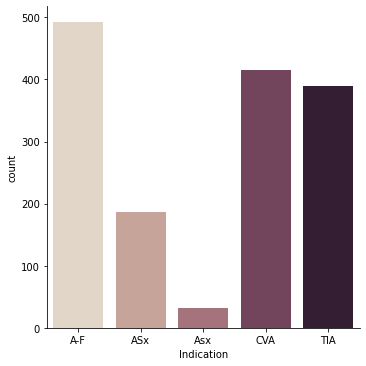

In [29]:
#https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(x="Indication", kind="count", palette="ch:.25", data=dfCopy)

Here we can see that that the Indication column has an issue with the casing, this has caused problems when we want to display the data as the lower case and upper case of versions of **'ASX'** are being counted twice. We can fix this by ensuring all catergories are upper case.

In [30]:
#This changes the case of all values to upper case
dfCopy['Indication'] = dfCopy['Indication'].str.upper()

In [31]:
#This line changes the column type back to category
dfCopy["Indication"] = dfCopy["Indication"].astype('category')

In [32]:
print(f"Indication: {dfCopy['Indication'].unique()}")

Indication: ['CVA', 'A-F', 'ASX', 'TIA', NaN]
Categories (4, object): ['CVA', 'A-F', 'ASX', 'TIA']


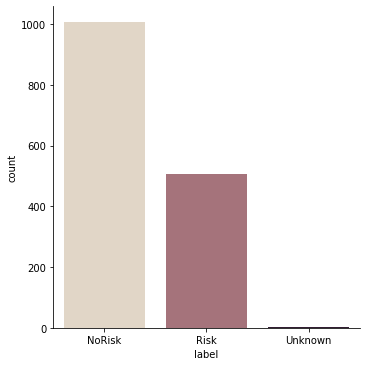

In [33]:
sns.catplot(x="label", kind="count", palette="ch:.25", data=dfCopy)

The null values within the label column have been incorrectly labeled as **'Unknown'**, this has meant they have not been automatically set to **'NaN'** and will not be picked up by the isnull check later on. We can fix this by replacing the values of **'Unknown'** to **'NaN'**.

In [34]:
#This line replaces any mention of 'Unknown' to NaN
dfCopy['label'] = dfCopy['label'].replace('Unknown', np.NaN)

In [35]:
print(f"label: {dfCopy['label'].unique()}")

label: ['Risk', 'NoRisk', NaN]
Categories (2, object): ['Risk', 'NoRisk']


Now we need to fix the casing for the column **'label'**, we will change it to **'Label'**

In [36]:
dfCopy = dfCopy.rename(columns = {'label':'Label'})

## Fix any repeated rows or values

We identified issues with repeating values during the data understanding section within the **'Random'** column.

I will compare the two methods I outlined within the data understanding section of this notebook, first I will attempt to remove any repeated rows, then I will compare that against keeping one row of each case of repetition, and then finally I will attempt to remove the two identifying rows.

In [37]:
random = pd.Series(df['Random'])

In [38]:
random.shape

(1520,)

If we drop all dupplicated rows from the data set then we find that only 949 rows out of the original 1520 are left

In [39]:
dfRepeat = dfCopy.copy()

In [40]:
dfRepeat = dfRepeat.drop_duplicates(['Random'], keep = False)
dfRepeat['Random'].count()

949

On the other hand if we keep one row out of each set of of duplicated rows we keep 1222 rows out of the original 1520

In [41]:
dfRepeat = dfCopy.copy()
dfRepeat = dfRepeat.drop_duplicates(['Random'])

In [42]:
dfRepeat['Random'].count()

1222

Our final option is to just remove the columns **'Random'** and **'Id'**, this leaves us with the original number of rows and will not effect the outcome of the the later modeling stages as these columns do not have any bearing on whether a patient is at risk or not. The models will benefit more from the data and as the Id number is still unique we have a high level of confidence that none of the actual data has been duplicated.

Removing columns which have no baring on the outcome of the classfier also helps us to reduce the problem space, helping to solve the issue of Hughes Phenomenon. 

In [43]:
#Now we remove the columns which offer no use to the KNN algorithm 
#dfRepeat = dfCopy.copy()
dfCopy = dfCopy.drop(['Random', 'Id'], axis=1)
dfCopy.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
0,CVA,yes,yes,yes,yes,no,89,100,Risk
1,CVA,no,no,no,no,no,67,100,NoRisk
2,CVA,no,yes,yes,no,no,79,20,NoRisk
3,A-F,no,yes,no,no,no,69,40,NoRisk
4,CVA,no,no,no,no,no,89,30,NoRisk


In [44]:
dfCopy.shape

(1520, 9)

## Find erroneous values e.g. too big or too small (Data Understanding)

In [45]:
dfCopy.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
0,CVA,yes,yes,yes,yes,no,89,100,Risk
1,CVA,no,no,no,no,no,67,100,NoRisk
2,CVA,no,yes,yes,no,no,79,20,NoRisk
3,A-F,no,yes,no,no,no,69,40,NoRisk
4,CVA,no,no,no,no,no,89,30,NoRisk


On the outset if we just briefly look at the values returned from the .describe() function it seems that the Contra values have a greater spread as they have a higher standard deviation. We can see that the IPSI values have a lower standard deviation so this susggests a smaller spread as the values are closer to the MEAN. We can also compare the MEAN and Median values for both columns, we can see that the IPSI MEAN is closer to its Median, which confirms what the standard deviation tells us. 

In [46]:
dfCopy.describe()

,IPSI,Contra
count,1516.000000,1519.000000
mean,77.872032,56.828176
std,10.162351,29.535671
min,34.000000,10.000000
25%,72.000000,30.000000
50%,76.000000,50.000000
75%,84.000000,85.000000
max,98.000000,100.000000


In [47]:
print(f"The mean for IPSI is: {dfCopy['IPSI'].mean()} and the Median is: {dfCopy['IPSI'].median()}")
print(f"The mean for Contra is: {dfCopy['Contra'].mean()} and the Median is: {dfCopy['Contra'].median()}")

The mean for IPSI is: 77.87203166226912 and the Median is: 76.0
The mean for Contra is: 56.82817643186307 and the Median is: 50.0


Here we have plotted the values of IPSI on a Histogram and a boxplot, the Histogram shows most of the values are in the top end nearly indicating a left skew, this could show that the MEAN of the data is not too accurate and the Median or Mode would be more accurate. We can also see that the curve is not symmetrical, with a small peak to the right of the main central peak, this also suggests the MEAN would not be an accurate measure for this data. We can also see that the main peak is quite narrow and tall which suggests most of the data is close to the mean, and this explains the low standard deviation. Using the box plot and histogram together we can identify outliers, these values lie between 0 - 50. The data would be improved by removing these outliers.

Text(0.5, 1.0, 'Histogram with KDE')

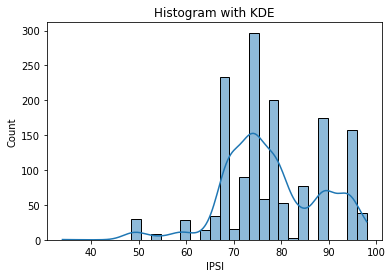

In [48]:
IPSI = dfCopy.IPSI.astype(float)
sns.histplot(x= IPSI, kde=True).set_title('Histogram with KDE')

Text(0.5, 1.0, 'Boxplot')

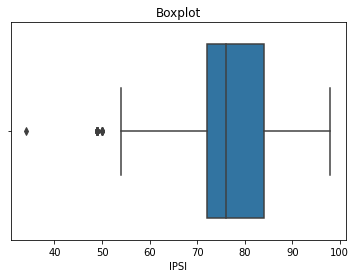

In [49]:
sns.boxplot(x=dfCopy['IPSI']).set_title('Boxplot')

Similarly we can use both a histogram and boxplot to analyse the Contra data, the histogram has a very flat curve which doesnt show a strong pattern. This would also explain why there is a high standard deviation as the data is spread out and not close to the MEAN. We can also see from both graphs that there is no outliers in this data. The box plot conforms what the histogram tells us, and that is that the data has a wide spread. 

Text(0.5, 1.0, 'Histogram with KDE')

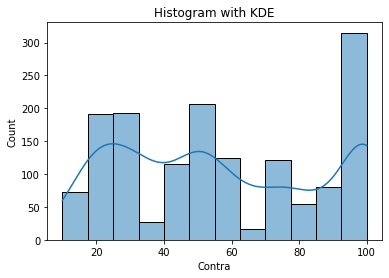

In [50]:
Contra = dfCopy.Contra.astype(float)
sns.histplot(x= Contra, kde=True).set_title('Histogram with KDE')

<AxesSubplot:xlabel='Contra'>

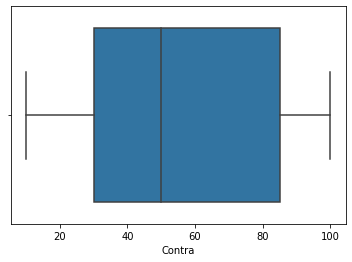

In [51]:
sns.boxplot(x=dfCopy['Contra'])

In [52]:
dfCopy.shape

(1520, 9)

In [53]:
#https://datascience.stackexchange.com/questions/54808/how-to-remove-outliers-using-box-plot
#Calculate the interquartile range of the IPSI values and use it to filter out the outliers within the data, also make sure to exlude the null values

Q1 = IPSI.quantile(0.25)
Q3 = IPSI.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 


filter = (Q1 - 1.5 * IQR >= IPSI) & (Q3 + 1.5 *IQR >= IPSI) & (IPSI.notnull())
filter = ~filter
dfCopy = dfCopy.loc[filter]
filter.value_counts()

True     1480
False      40
Name: IPSI, dtype: int64

In [54]:
#We can see that 40 features have been removed from the data set as they were outliers
dfCopy.shape

(1480, 9)

Text(0.5, 1.0, 'Boxplot')

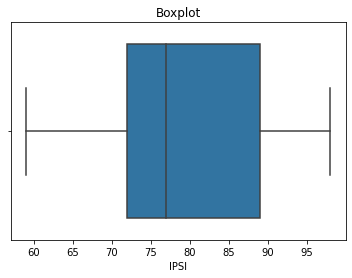

In [55]:
sns.boxplot(x=dfCopy['IPSI']).set_title('Boxplot')

We can no see from this boxplot that there are no outliers in our data anymore which makes it much better for later on when we want to train our model.

## Null values
We can now fix the null values which were identified earlier in the data understanding section

In [56]:
#Make a copy of the data which other cleaning methods can use
dfPCleaned = dfCopy.copy()

In [57]:
dfPCleaned[dfPCleaned.isnull().any(axis=1)].shape

(20, 9)

In [58]:
dfCopy[dfCopy.isnull().any(axis=1)].shape

(20, 9)

In [59]:
#We find out how many rows contain null values
dfCopy.isnull().any(axis =1).value_counts()

False    1460
True       20
dtype: int64

In [60]:
nullCount = dfCopy.isnull().any(axis =1).count()
nullSum = dfCopy.isnull().any(axis =1).sum()
percentageNull = (nullSum/nullCount)*100

In [61]:
print(f"There are a total number of {nullSum} null values after fixing casing and whitespace issues, within a dataset of {nullCount} rows\n")
print(f"The percentage of null values within the dataset is: {percentageNull}%\n")

There are a total number of 20 null values after fixing casing and whitespace issues, within a dataset of 1480 rows

The percentage of null values within the dataset is: 1.3513513513513513%



In [62]:
#This is a list of all the rows containing null values
dfCopy[dfCopy.isnull().any(axis=1)]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
21,CVA,yes,no,NaN,yes,no,94,90,Risk
43,A-F,NaN,no,yes,no,no,79,40,NoRisk
46,A-F,no,no,no,no,no,<NA>,50,NoRisk
54,CVA,no,yes,no,no,NaN,84,50,NoRisk
89,CVA,no,yes,yes,yes,no,<NA>,100,Risk
130,NaN,no,no,no,yes,yes,98,100,Risk
134,A-F,no,no,no,no,no,<NA>,100,Risk
155,TIA,yes,no,no,no,yes,89,50,NaN
202,CVA,no,yes,yes,yes,no,79,70,NaN
464,CVA,no,no,no,no,no,<NA>,20,NoRisk


### Remove or fix null values
When it comes to fixing the Null values manually found within the data I have multiple options:
1. I can remove the whole row 
2. I can fix the row by predicting what the value should be using one of three techniques, filling in the MODE, find a record with 1 similar attribute, or Nearest neighbour (closest row from all attributes)  

When it comes to predicting values I will be creating a search expression to find almost exact matches to my offending row. If more than half of the results suggest the same value I will use this as the replacement. If there is only 1 other identical row I will remove the row as that is not enough data to be certain. 

#### Indication null values

In [63]:
dfCopy[dfCopy['Indication'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
130,NaN,no,no,no,yes,yes,98,100,Risk
505,NaN,no,yes,yes,no,no,69,40,NoRisk
1088,NaN,no,yes,no,no,no,79,100,Risk


**Index 130**

In [64]:
exprForIndex130 = ((dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'no') & (dfCopy['Arrhythmia'] == 'yes') & (dfCopy['History'] == 'yes')& (dfCopy['IPSI'] == 98.0) & (dfCopy['Contra'] == 100.0) & (dfCopy['Label'] == 'Risk'))

dfCopy[exprForIndex130]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
124,CVA,no,no,no,yes,yes,98,100,Risk
130,NaN,no,no,no,yes,yes,98,100,Risk
369,CVA,no,no,no,yes,yes,98,100,Risk
752,CVA,no,no,no,yes,yes,98,100,Risk
782,CVA,no,no,no,yes,yes,98,100,Risk


If we search the data set for a nearest neighbour closest to the missing Indication attribute we find that all of the rows using identical attributes to row 130 have the Indication as **'CVA'**. 

In [65]:
#Replace row with the predicted data
dfCopy.loc[130, 'Indication']= 'CVA'

**Index 505**

In [66]:
exprForIndex505 = ((dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no')& (dfCopy['IPSI'] == 69.0) & (dfCopy['Contra'] == 40.0) & (dfCopy['Label'] == 'NoRisk'))

dfCopy[exprForIndex505]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
276,A-F,no,yes,yes,no,no,69,40,NoRisk
505,NaN,no,yes,yes,no,no,69,40,NoRisk
1149,A-F,no,yes,yes,no,no,69,40,NoRisk
1400,A-F,no,yes,yes,no,no,69,40,NoRisk
1413,A-F,no,yes,yes,no,no,69,40,NoRisk
1432,A-F,no,yes,yes,no,no,69,40,NoRisk


Searching the dataset for rows which match all of the values other than our missing Indication values finds five other nearest neighbour rows. Using this information we can predict that the missing attribute is **'A-F'**.

In [67]:
#Replace row with correct predicted data
dfCopy.loc[505, 'Indication']= 'A-F'

**Index 1088**

In [68]:
exprForIndex1088 = ((dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'no') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no')& (dfCopy['IPSI'] == 79.0) & (dfCopy['Contra'] == 100.0) & (dfCopy['Label'] == 'Risk'))

dfCopy[exprForIndex1088]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
579,A-F,no,yes,no,no,no,79,100,Risk
1005,A-F,no,yes,no,no,no,79,100,Risk
1088,NaN,no,yes,no,no,no,79,100,Risk


After searching through the avaiable data using the same attributes supplied by the row with the missing value. We can see there are two other nearest neighbours and both of them have **'A-F'** in the Indication column.

In [69]:
#Replace row with correct predicted data
dfCopy.loc[1088, 'Indication']= 'A-F'

#### Diabetes null values

In [70]:
dfCopy[dfCopy['Diabetes'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
43,A-F,NaN,no,yes,no,no,79,40,NoRisk
1406,CVA,NaN,yes,yes,yes,no,89,100,Risk


**Index 43**

In [71]:
exprForIndex43 = ((dfCopy['Indication'] == 'A-F') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no')& (dfCopy['IPSI'] == 79.0) & (dfCopy['Contra'] == 40.0) & (dfCopy['Label'] == 'NoRisk'))

dfCopy[exprForIndex43]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
43,A-F,NaN,no,yes,no,no,79,40,NoRisk
244,A-F,no,no,yes,no,no,79,40,NoRisk
656,A-F,no,no,yes,no,no,79,40,NoRisk
1079,A-F,no,no,yes,no,no,79,40,NoRisk
1130,A-F,no,no,yes,no,no,79,40,NoRisk
1354,A-F,no,no,yes,no,no,79,40,NoRisk


After searching through the available data using the other available information in the row. We can see that there a 5 smilar rows which all have the value of **'no'** for Diabetes

In [72]:
#Replace row with correct predicted data
dfCopy.loc[43, 'Diabetes']= 'no'

**Index 1406**

In [73]:
exprForIndex1406 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'yes') & (dfCopy['History'] == 'no')& (dfCopy['IPSI'] == 89.0) & (dfCopy['Contra'] == 100.0) & (dfCopy['Label'] == 'Risk'))

dfCopy[exprForIndex1406]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
0,CVA,yes,yes,yes,yes,no,89,100,Risk
39,CVA,no,yes,yes,yes,no,89,100,Risk
72,CVA,no,yes,yes,yes,no,89,100,Risk
108,CVA,no,yes,yes,yes,no,89,100,Risk
237,CVA,no,yes,yes,yes,no,89,100,Risk
376,CVA,no,yes,yes,yes,no,89,100,Risk
412,CVA,no,yes,yes,yes,no,89,100,Risk
440,CVA,no,yes,yes,yes,no,89,100,Risk
482,CVA,no,yes,yes,yes,no,89,100,Risk
527,CVA,no,yes,yes,yes,no,89,100,Risk


From the result of the query we can see that **'no'** has appeared more frequently and so we can predict that it would be the best fit in this situation.

In [74]:
DiaNoCount = dfCopy[exprForIndex1406 & (dfCopy['Diabetes'] == 'no')].Diabetes.count() 
DiaYesCount = dfCopy[exprForIndex1406 & (dfCopy['Diabetes'] == 'yes')].Diabetes.count()
totalDia = DiaNoCount + DiaYesCount
noMeanDia = (DiaNoCount / totalDia)
yesMeanDia = (DiaYesCount/totalDia)
print(f"The mean of 'no' is {noMeanDia} and the mean of 'yes' is {yesMeanDia}, we can see that 'no' is higher and thus would be the best fit")

The mean of 'no' is 0.9130434782608695 and the mean of 'yes' is 0.08695652173913043, we can see that 'no' is higher and thus would be the best fit


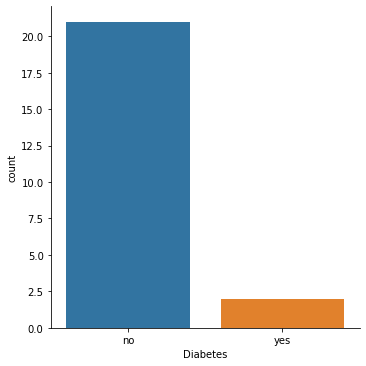

In [75]:
sns.catplot(data=dfCopy[exprForIndex1406], x="Diabetes", kind='count')

In [76]:
#Replace row with correct predicted data
dfCopy.loc[1406, 'Diabetes']= 'no'

#### Hypertension null values

In [77]:
dfCopy[dfCopy['Hypertension'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
21,CVA,yes,no,NaN,yes,no,94,90,Risk
805,A-F,no,no,NaN,no,no,77,30,NoRisk
1222,TIA,no,no,NaN,no,no,74,75,NoRisk


**Index 21**

In [78]:
exprForIndex21 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'yes') & (dfCopy['IHD'] == 'no')& (dfCopy['Arrhythmia'] == 'yes') & (dfCopy['History'] == 'no')& (dfCopy['IPSI'] == 94.0) & (dfCopy['Contra'] == 90.0) & (dfCopy['Label'] == 'Risk'))

dfCopy[exprForIndex21]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
21,CVA,yes,no,NaN,yes,no,94,90,Risk
1290,CVA,yes,no,yes,yes,no,94,90,Risk


If we search for the nearest neighbour of the row, which contain the null attribute, we only find one other row which matches. This is not enough data to confidently predict what the null attribute should have been so the best course of action is to remove the row.

In [79]:
#Here we drop row 21 
dfCopy = dfCopy.drop([21], axis=0)

**Index 805**

In [80]:
exprForIndex805 = ((dfCopy['Indication'] == 'A-F') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no')& (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['IPSI'] == 77.0) & (dfCopy['Contra'] == 30.0) & (dfCopy['Label'] == 'NoRisk'))
dfCopy[exprForIndex805]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
211,A-F,no,no,no,no,no,77,30,NoRisk
262,A-F,no,no,no,no,no,77,30,NoRisk
309,A-F,no,no,no,no,no,77,30,NoRisk
577,A-F,no,no,no,no,no,77,30,NoRisk
648,A-F,no,no,no,no,no,77,30,NoRisk
651,A-F,no,no,no,no,no,77,30,NoRisk
805,A-F,no,no,NaN,no,no,77,30,NoRisk
1018,A-F,no,no,no,no,no,77,30,NoRisk
1370,A-F,no,no,no,no,no,77,30,NoRisk
1393,A-F,no,no,no,no,no,77,30,NoRisk


I have searched for the nearest neighbour of the row with index 805 and found 11 rows which directly match. From this we can make the assumption that hypertension should have been set to **'no'**, all of the nearest neighbour rows support this. There are also no rows which contradict this so we can say with some confidence that this is the case.

In [81]:
#Replace row with correct predicted data
dfCopy.loc[805, 'Hypertension']= 'no'

**Index 1222**

In [82]:
exprForIndex1222 = ((dfCopy['Indication'] == 'TIA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['IPSI'] == 74.0) & (dfCopy['Contra'] == 75.0) & (dfCopy['Label'] == 'NoRisk'))
dfCopy[exprForIndex1222]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
218,TIA,no,no,yes,no,no,74,75,NoRisk
498,TIA,no,no,no,no,no,74,75,NoRisk
678,TIA,no,no,no,no,no,74,75,NoRisk
902,TIA,no,no,no,no,no,74,75,NoRisk
1152,TIA,no,no,no,no,no,74,75,NoRisk
1211,TIA,no,no,yes,no,no,74,75,NoRisk
1222,TIA,no,no,NaN,no,no,74,75,NoRisk
1318,TIA,no,no,no,no,no,74,75,NoRisk
1476,TIA,no,no,no,no,no,74,75,NoRisk


Predicting the missing value of this row is slightly more difficult as there are nearest neighbour rows containing the value of **'yes'** and **'no'**. Although, we can see that the value of **'no'** appears with more frequency so we can predict that the missing attribute would have most likely been **'no'**.

We can confirm that **'no'** has the most frequency within the nearest neighbour rows by calculating the mean of **'yes'** and **'no'**.

In [83]:
hypNoCount = dfCopy[exprForIndex1222 & (dfCopy['Hypertension'] == 'no')].Hypertension.count() 
hypYesCount = dfCopy[exprForIndex1222 & (dfCopy['Hypertension'] == 'yes')].Hypertension.count()

In [84]:
totalHyp = hypNoCount + hypYesCount
noMeanHyp = (hypNoCount / totalHyp)
yesMeanHyp = (hypYesCount/totalHyp)
print(f"The mean of 'no' is {noMeanHyp} and the mean of 'yes' is {yesMeanHyp}, we can see that 'no' is higher and thus is the best fit")

The mean of 'no' is 0.75 and the mean of 'yes' is 0.25, we can see that 'no' is higher and thus is the best fit


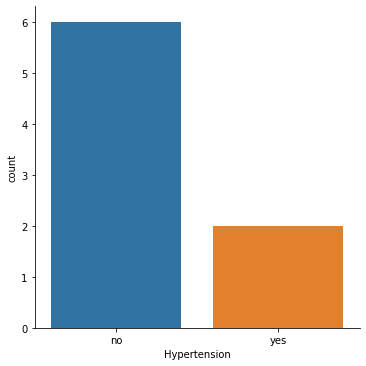

In [85]:
sns.catplot(data=dfCopy[exprForIndex1222], x="Hypertension", kind='count')

We can see that over half of the 

In [86]:
#Replace row with correct predicted data
dfCopy.loc[1222, 'Hypertension']= 'no'

#### History null values

In [87]:
dfCopy[dfCopy['History'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
54,CVA,no,yes,no,no,NaN,84,50,NoRisk
1163,CVA,no,no,yes,yes,NaN,94,100,Risk


**Index 54**

In [88]:
exprForIndex54 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'no') & (dfCopy['Arrhythmia'] == 'no')  & (dfCopy['IPSI'] == 84.0) & (dfCopy['Contra'] == 50.0) & (dfCopy['Label'] == 'NoRisk'))
dfCopy[exprForIndex54]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
54,CVA,no,yes,no,no,NaN,84,50,NoRisk
121,CVA,no,yes,no,no,no,84,50,NoRisk
142,CVA,no,yes,no,no,no,84,50,NoRisk
1155,CVA,no,yes,no,no,no,84,50,NoRisk
1249,CVA,no,yes,no,no,no,84,50,NoRisk


After searching the data set we can see that there are 4 other identical rows which are not missing the history value. They are all using the value of **'no'**.

In [89]:
#Replace row with correct predicted data
dfCopy.loc[54, 'History']= 'no'

**Index 1163**

In [90]:
exprForIndex1163 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'yes')  & (dfCopy['IPSI'] == 94.0) & (dfCopy['Contra'] == 100.0) & (dfCopy['Label'] == 'Risk'))
dfCopy[exprForIndex1163]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
14,CVA,no,no,yes,yes,no,94,100,Risk
47,CVA,no,no,yes,yes,no,94,100,Risk
139,CVA,no,no,yes,yes,no,94,100,Risk
148,CVA,no,no,yes,yes,no,94,100,Risk
259,CVA,no,no,yes,yes,no,94,100,Risk
266,CVA,no,no,yes,yes,no,94,100,Risk
275,CVA,no,no,yes,yes,no,94,100,Risk
283,CVA,no,no,yes,yes,no,94,100,Risk
318,CVA,no,no,yes,yes,no,94,100,Risk
327,CVA,no,no,yes,yes,no,94,100,Risk


This query has found 21 other rows which are identitcal to the expression. These rows match the row with a missing value, in the History column they all contain the value of **'no'**.

In [91]:
#Replace row with correct predicted data
dfCopy.loc[1163, 'History']= 'no'

#### IPSI null values

In [92]:
dfCopy[dfCopy['IPSI'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
46,A-F,no,no,no,no,no,<NA>,50,NoRisk
89,CVA,no,yes,yes,yes,no,<NA>,100,Risk
134,A-F,no,no,no,no,no,<NA>,100,Risk
464,CVA,no,no,no,no,no,<NA>,20,NoRisk


**Index 46**

In [93]:
exprForIndex46 = ((dfCopy['Indication'] == 'A-F') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'no') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['Contra'] == 50.0) & (dfCopy['Label'] == 'NoRisk'))
dfCopy[exprForIndex46]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
46,A-F,no,no,no,no,no,<NA>,50,NoRisk
58,A-F,no,no,no,no,no,73,50,NoRisk
170,A-F,no,no,no,no,no,66,50,NoRisk
297,A-F,no,no,no,no,no,73,50,NoRisk
352,A-F,no,no,no,no,no,89,50,NoRisk
571,A-F,no,no,no,no,no,69,50,NoRisk
605,A-F,no,no,no,no,no,73,50,NoRisk
647,A-F,no,no,no,no,no,79,50,NoRisk
674,A-F,no,no,no,no,no,89,50,NoRisk
688,A-F,no,no,no,no,no,69,50,NoRisk


In [94]:
print(f"The standard deviation for this query is: {dfCopy[exprForIndex46].IPSI.std()}")

The standard deviation for this query is: 9.376154899624598


We can see that this method of manually querying the data works quite well for categorical values but when it comes to numeric values there is a much wider spread of values. The standard deviation of this query is above this cell, we can see that there is a fair amount of spread between values so we will need to take a closer look at the data to predict a value.

In [95]:
IPSI46 = dfCopy[exprForIndex46].IPSI.astype(float)

Text(0.5, 1.0, 'Histogram with KDE')

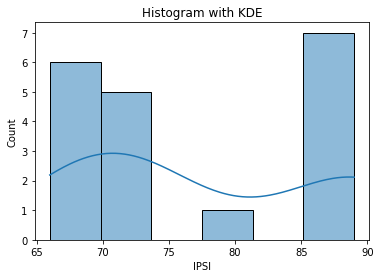

In [96]:
sns.histplot(x= IPSI46, kde=True).set_title('Histogram with KDE')

Text(0.5, 1.0, 'Violin plot')

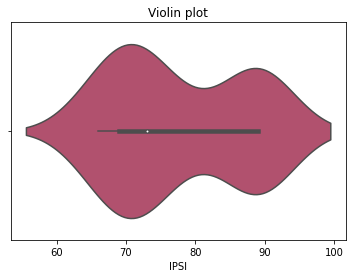

In [97]:
sns.violinplot(x=IPSI46, palette= 'flare').set_title('Violin plot')

Looking at the first graph we can see that by a small margin, values between 85 and 90 are the most frequent. But if we take into account the second violin graph we can see that there is a much bigger grouping of values around the 70 mark, furthermore our median value fits within this grouping of values. Using this information we can say with some confidence that using the median value of the query will give us a fairly accurate guess at what the missing value should be.

In [98]:
dfCopy.loc[46, 'IPSI']= IPSI46.median()

**Index 89**

In [99]:
exprForIndex89 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'yes') & (dfCopy['History'] == 'no') & (dfCopy['Contra'] == 100.0) & (dfCopy['Label'] == 'Risk'))
dfCopy[exprForIndex89]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
39,CVA,no,yes,yes,yes,no,89,100,Risk
72,CVA,no,yes,yes,yes,no,89,100,Risk
89,CVA,no,yes,yes,yes,no,<NA>,100,Risk
108,CVA,no,yes,yes,yes,no,89,100,Risk
132,CVA,no,yes,yes,yes,no,69,100,Risk
204,CVA,no,yes,yes,yes,no,69,100,Risk
231,CVA,no,yes,yes,yes,no,84,100,Risk
237,CVA,no,yes,yes,yes,no,89,100,Risk
329,CVA,no,yes,yes,yes,no,69,100,Risk
376,CVA,no,yes,yes,yes,no,89,100,Risk


In [100]:
print(f"The standard deviation for this query is: {dfCopy[exprForIndex89].IPSI.std()}")

The standard deviation for this query is: 7.803018439949604


The standard deviation of this query again fairly moderate, this suggests that there is some spread within the values from the query.

In [101]:
IPSI89 = dfCopy[exprForIndex89].IPSI.astype(float)

Text(0.5, 1.0, 'Histogram with KDE')

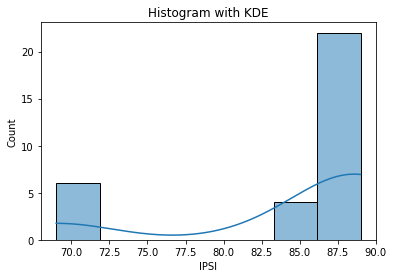

In [102]:
sns.histplot(x= IPSI89, kde=True).set_title('Histogram with KDE')

Text(0.5, 1.0, 'Violin plot')

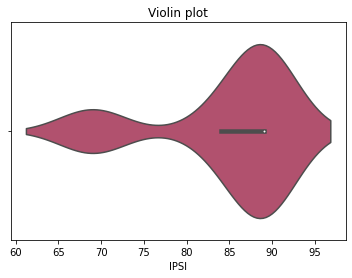

In [103]:
sns.violinplot(x=IPSI89, palette= 'flare').set_title('Violin plot')

We can see fairly clearly in both graphs that the majority of the values are grouped within the upper end, the most frequent values are around 90. The median value is also 90 so we can say with a lot of confidence that the missing value was most likely **'90'**.

In [104]:
dfCopy.loc[89, 'IPSI']= IPSI89.median()

**Index 134**

In [105]:
exprForIndex134 = ((dfCopy['Indication'] == 'A-F') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'no') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['Contra'] == 100.0) & (dfCopy['Label'] == 'Risk'))
dfCopy[exprForIndex134]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
134,A-F,no,no,no,no,no,<NA>,100,Risk
243,A-F,no,no,no,no,no,74,100,Risk
315,A-F,no,no,no,no,no,79,100,Risk
776,A-F,no,no,no,no,no,79,100,Risk
1033,A-F,no,no,no,no,no,79,100,Risk
1035,A-F,no,no,no,no,no,84,100,Risk
1362,A-F,no,no,no,no,no,74,100,Risk
1392,A-F,no,no,no,no,no,84,100,Risk


In [106]:
print(f"The standard deviation for this query is: {dfCopy[exprForIndex134].IPSI.std()}")

The standard deviation for this query is: 4.08248290463863


For this query there are less results but with that, there is also a lower standard deviation. This suggests there will also be a smaller spread of values. 

In [107]:
IPSI134 = dfCopy[exprForIndex134].IPSI.astype(float)

Text(0.5, 1.0, 'Histogram with KDE')

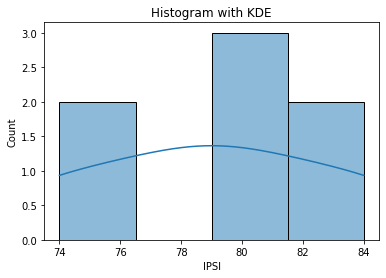

In [108]:
sns.histplot(x= IPSI134, kde=True).set_title('Histogram with KDE')

Text(0.5, 1.0, 'Violin plot')

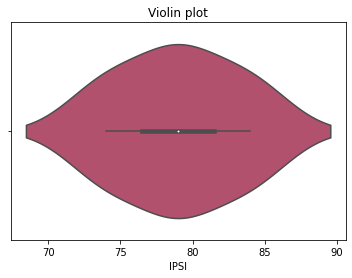

In [109]:
sns.violinplot(x=IPSI134, palette= 'flare').set_title('Violin plot')

As predicted there is only one grouping of values, it is also quite clear where the median value is. We can say with some confidence that this median value of just under 80 is the best fit for the missing value in our feature. 

In [110]:
dfCopy.loc[134, 'IPSI']= IPSI134.median()

**Index 464**

In [111]:
exprForIndex464 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'no') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['Contra'] == 20.0) & (dfCopy['Label'] == 'NoRisk'))
dfCopy[exprForIndex464]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
63,CVA,no,no,no,no,no,67,20,NoRisk
95,CVA,no,no,no,no,no,79,20,NoRisk
105,CVA,no,no,no,no,no,67,20,NoRisk
263,CVA,no,no,no,no,no,59,20,NoRisk
308,CVA,no,no,no,no,no,72,20,NoRisk
310,CVA,no,no,no,no,no,69,20,NoRisk
316,CVA,no,no,no,no,no,59,20,NoRisk
404,CVA,no,no,no,no,no,69,20,NoRisk
464,CVA,no,no,no,no,no,<NA>,20,NoRisk
497,CVA,no,no,no,no,no,59,20,NoRisk


In [112]:
print(f"The standard deviation for this query is: {dfCopy[exprForIndex464].IPSI.std()}")

The standard deviation for this query is: 7.119773624953833


For this query the standard devisation is fair, there are quite a few values which match the search criteria, we will need to visualise the data to get a clearer understanding of what is the best value to fit our missing data.

In [113]:
IPSI464 = dfCopy[exprForIndex464].IPSI.astype(float)

Text(0.5, 1.0, 'Histogram with KDE')

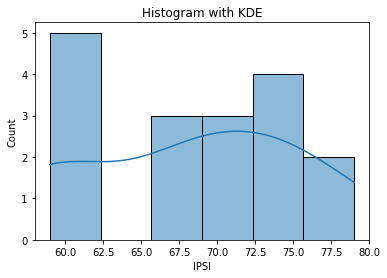

In [114]:
sns.histplot(x= IPSI464, kde=True).set_title('Histogram with KDE')

Text(0.5, 1.0, 'Violin plot')

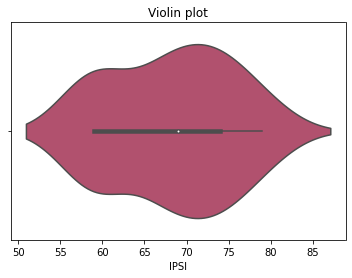

In [115]:
sns.violinplot(x=IPSI464, palette= 'flare').set_title('Violin plot')

It is a little less clear what the best value from the data returned by this query. We can see in the first graph that the lower values around the 60 mark are the most common, but if we take into account the second graph it is clear the median value is part of the grouping of higher numbers around 65 - 75. This puts our best fit value around the 70 mark. 

In [116]:
dfCopy.loc[464, 'IPSI']= IPSI464.median()

#### Contra null values

In [117]:
dfCopy[dfCopy['Contra'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
642,ASX,no,no,yes,no,no,69,<NA>,NoRisk


**Index 642**

In [118]:
exprForIndex642 = ((dfCopy['Indication'] == 'ASX') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['IPSI'] == 69.0) & (dfCopy['Label'] == 'NoRisk'))
dfCopy[exprForIndex642]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
73,ASX,no,no,yes,no,no,69,60,NoRisk
92,ASX,no,no,yes,no,no,69,60,NoRisk
425,ASX,no,no,yes,no,no,69,60,NoRisk
453,ASX,no,no,yes,no,no,69,60,NoRisk
642,ASX,no,no,yes,no,no,69,<NA>,NoRisk
1123,ASX,no,no,yes,no,no,69,60,NoRisk


In [119]:
print(f"The standard deviation for this query is: {dfCopy[exprForIndex642].IPSI.std()}")

The standard deviation for this query is: 0.0


We can see that the standard devation for this query is 0, this tells us that all of the features returned by the query have an identical value for the Contra column. This value is 60 and will be used in place of the missing value.

In [120]:
dfCopy.loc[642, 'Contra']= IPSI464.median()

#### Label null values

In [121]:
dfCopy[dfCopy['Label'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
155,TIA,yes,no,no,no,yes,89,50,NaN
202,CVA,no,yes,yes,yes,no,79,70,NaN
471,CVA,no,yes,yes,no,no,75,50,NaN
1415,ASX,no,yes,yes,no,no,69,55,NaN
1467,CVA,no,no,yes,yes,no,94,100,NaN


**Index 155**

In [122]:
exprForIndex155 = ((dfCopy['Indication'] == 'TIA') & (dfCopy['Diabetes'] == 'yes') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'no') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'yes') & (dfCopy['IPSI'] == 89.0) & (dfCopy['Contra'] == 50))
dfCopy[exprForIndex155]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
155,TIA,yes,no,no,no,yes,89,50,NaN
386,TIA,yes,no,no,no,yes,89,50,Risk


When we do a manual search for the nearest neighbour using the attributes of our feature with a missing value, we only find one other row. This is not enough data to accuratly predict what the value should be so our best course of action is to remove this row. 

In [123]:
#Here we drop row 155
dfCopy = dfCopy.drop([155], axis=0)

**Index 202**

In [124]:
exprForIndex202 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'yes') & (dfCopy['History'] == 'no') & (dfCopy['IPSI'] == 79.0) & (dfCopy['Contra'] == 70))
dfCopy[exprForIndex202]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
202,CVA,no,yes,yes,yes,no,79,70,NaN
399,CVA,no,yes,yes,yes,no,79,70,Risk
928,CVA,no,yes,yes,yes,no,79,70,Risk
1041,CVA,no,yes,yes,yes,no,79,70,Risk


After this query search we can see that **'Risk'** is the most frequent and only value that appears in the Label column, this gives a high level of confidence that this would have been the missing value.

In [125]:
dfCopy.loc[202, 'Label']= 'Risk'

**Index 471**

In [126]:
exprForIndex471 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['IPSI'] == 75.0) & (dfCopy['Contra'] == 50))
dfCopy[exprForIndex471]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
395,CVA,no,yes,yes,no,no,75,50,NoRisk
471,CVA,no,yes,yes,no,no,75,50,NaN
511,CVA,no,yes,yes,no,no,75,50,NoRisk
1074,CVA,no,yes,yes,no,no,75,50,NoRisk
1373,CVA,no,yes,yes,no,no,75,50,NoRisk


Again this query has returned 4 idential rows to the one with our missing value. We can see that all of these features contain the value of **'NoRisk'** so we can say with some certainty that this would have been the missing value.

In [127]:
dfCopy.loc[471, 'Label']= 'NoRisk'

**Index 1415**

In [128]:
exprForIndex1415 = ((dfCopy['Indication'] == 'ASX') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'yes') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'no') & (dfCopy['History'] == 'no') & (dfCopy['IPSI'] == 69.0) & (dfCopy['Contra'] == 55))
dfCopy[exprForIndex1415]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
1415,ASX,no,yes,yes,no,no,69,55,NaN


When we query data using identical values to the feature with the missing Label, we find that no other rows are found. Wihtout any other features to compare too we cannot make a prediction on the missing value and the row must be removed.

In [129]:
#Here we drop row 1415
dfCopy = dfCopy.drop([1415], axis=0)

**Index 1467**

In [130]:
exprForIndex1467 = ((dfCopy['Indication'] == 'CVA') & (dfCopy['Diabetes'] == 'no') & (dfCopy['IHD'] == 'no') & (dfCopy['Hypertension'] == 'yes') & (dfCopy['Arrhythmia'] == 'yes') & (dfCopy['History'] == 'no') & (dfCopy['IPSI'] == 94.0) & (dfCopy['Contra'] == 100))
dfCopy[exprForIndex1467]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
14,CVA,no,no,yes,yes,no,94,100,Risk
47,CVA,no,no,yes,yes,no,94,100,Risk
139,CVA,no,no,yes,yes,no,94,100,Risk
148,CVA,no,no,yes,yes,no,94,100,Risk
259,CVA,no,no,yes,yes,no,94,100,Risk
266,CVA,no,no,yes,yes,no,94,100,Risk
275,CVA,no,no,yes,yes,no,94,100,Risk
283,CVA,no,no,yes,yes,no,94,100,Risk
318,CVA,no,no,yes,yes,no,94,100,Risk
327,CVA,no,no,yes,yes,no,94,100,Risk


We can see that the query has returned 22 identical rows using the attributes from the feature with a missing value. All of them have the Label set to Risk so we can say with a high level on confidence that this would have been the missing value.

In [131]:
dfCopy.loc[1467, 'Label']= 'Risk'

In [132]:
#We can see now that there are no null values left in the data set so we know we have manually fixed all of the errors.
dfCopy[dfCopy.isnull().any(axis=1)]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label


## Alternative handling of null values (KNN (k-Nearest Neighbour) Impute)
Reference: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [133]:
#This is a list of all of the features with null values
dfPCleaned[dfPCleaned.isnull().any(axis=1)]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
21,CVA,yes,no,NaN,yes,no,94,90,Risk
43,A-F,NaN,no,yes,no,no,79,40,NoRisk
46,A-F,no,no,no,no,no,<NA>,50,NoRisk
54,CVA,no,yes,no,no,NaN,84,50,NoRisk
89,CVA,no,yes,yes,yes,no,<NA>,100,Risk
130,NaN,no,no,no,yes,yes,98,100,Risk
134,A-F,no,no,no,no,no,<NA>,100,Risk
155,TIA,yes,no,no,no,yes,89,50,NaN
202,CVA,no,yes,yes,yes,no,79,70,NaN
464,CVA,no,no,no,no,no,<NA>,20,NoRisk


In [134]:
#We create a copy of the data which contains all of the null values
dfEncode = dfPCleaned.copy()
dfEncode.isnull().sum()

Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          1
Label           5
dtype: int64

In [135]:
#Drop the columns which do not need to be encoded
dfLB = dfEncode.drop(['IPSI','Contra'], axis=1)
#Drop the columns which are about to be encoded
dfEncode = dfEncode.drop(['Indication','Diabetes','IHD','Hypertension','Arrhythmia','History', 'Label'], axis=1)

#Reference https://stackoverflow.com/questions/54444260/Labelencoder-that-keeps-missing-values-as-nan
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#We use the LabelEncoder to encode the categorical data into something the KNN imputer can use

series_stack = dfLB.stack().astype(str)
Label_encoder = preprocessing.LabelEncoder()
dfLB = pd.Series(
    Label_encoder.fit_transform(series_stack),
    index=series_stack.index
).unstack()

#Add the newly encoded columns back to the main dataframe
dfEncode = pd.concat([dfEncode, dfLB], axis=1)

dfEncode.head()


,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label
0,89,100,2.0,7.0,7.0,7.0,7.0,6.0,4.0
1,67,100,2.0,6.0,6.0,6.0,6.0,6.0,3.0
2,79,20,2.0,6.0,7.0,7.0,6.0,6.0,3.0
3,69,40,0.0,6.0,7.0,6.0,6.0,6.0,3.0
4,89,30,2.0,6.0,6.0,6.0,6.0,6.0,3.0


In [136]:
#Now we normalise the data so that there isnt a bias due to larger numbers 
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
dfEncode = pd.DataFrame(scaler.fit_transform(dfEncode), columns = dfEncode.columns)
dfEncode.head()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label
0,0.769231,1.000000,0.4,1.0,1.0,1.0,1.0,0.0,1.0
1,0.205128,1.000000,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.512821,0.111111,0.4,0.0,1.0,1.0,0.0,0.0,0.0
3,0.256410,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.769231,0.222222,0.4,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
#Now we feed the normalised and encoded data into the sklearn KNN impute function.
#we give it the arguement of 1 neighbour, this means the nearest neighbour is used to predict the missing values.
#If we were not using nominal values this number could be higher and the mean of the nearest neighbours would be used.
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

imputer = KNNImputer(n_neighbors=1)
dfEncode = pd.DataFrame(imputer.fit_transform(dfEncode),columns = dfEncode.columns)

In [138]:
#All of the null values have now been replaced using KNN
dfEncode.isnull().any()

IPSI            False
Contra          False
Indication      False
Diabetes        False
IHD             False
Hypertension    False
Arrhythmia      False
History         False
Label           False
dtype: bool

In [139]:
dfEncode.head()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label
0,0.769231,1.000000,0.4,1.0,1.0,1.0,1.0,0.0,1.0
1,0.205128,1.000000,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.512821,0.111111,0.4,0.0,1.0,1.0,0.0,0.0,0.0
3,0.256410,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.769231,0.222222,0.4,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
dfEncode[dfEncode.isnull().any(axis=1)]

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label


## Alternative handling of null values (Remove all rows with null values)

In [141]:
#This is a list of all of the features with null values
dfPCleaned[dfPCleaned.isnull().any(axis=1)]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Label
21,CVA,yes,no,NaN,yes,no,94,90,Risk
43,A-F,NaN,no,yes,no,no,79,40,NoRisk
46,A-F,no,no,no,no,no,<NA>,50,NoRisk
54,CVA,no,yes,no,no,NaN,84,50,NoRisk
89,CVA,no,yes,yes,yes,no,<NA>,100,Risk
130,NaN,no,no,no,yes,yes,98,100,Risk
134,A-F,no,no,no,no,no,<NA>,100,Risk
155,TIA,yes,no,no,no,yes,89,50,NaN
202,CVA,no,yes,yes,yes,no,79,70,NaN
464,CVA,no,no,no,no,no,<NA>,20,NoRisk


In [142]:
#There are 20 features containing null values
dfPCleaned[dfPCleaned.isnull().any(axis=1)].shape

(20, 9)

In [143]:
#Make a copy of the data
dfDrop = dfPCleaned.copy()

In [144]:
dfDrop.shape

(1480, 9)

In [145]:
#Here we drop the features which contain a null value, we can see there was 1520 rows and there is now 1500
dfDrop = dfDrop.dropna()

In [146]:
dfDrop.shape

(1460, 9)

In [147]:
dfDrop[dfDrop.isnull().any(axis=1)].shape

(0, 9)

## Alternative handling of null values (Fill with MODE)

In [148]:
dfMode = dfPCleaned.copy() 

In [149]:
dfPCleaned['Indication'].unique()

['CVA', 'A-F', 'ASX', 'TIA', NaN]
Categories (4, object): ['CVA', 'A-F', 'ASX', 'TIA']

In [150]:
#Drop the columns which do not need to be encoded
dfLB = dfMode.drop(['IPSI','Contra'], axis=1)
#Drop the columns which are about to be encoded
dfMode = dfMode.drop(['Indication','Diabetes','IHD','Hypertension','Arrhythmia','History', 'Label'], axis=1)

#Reference https://stackoverflow.com/questions/54444260/Labelencoder-that-keeps-missing-values-as-nan
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#We use the LabelEncoder to encode the categorical data into something the KNN imputer can use

series_stack = dfLB.stack().astype(str)
Label_encoder = preprocessing.LabelEncoder()
dfLB = pd.Series(
    Label_encoder.fit_transform(series_stack),
    index=series_stack.index
).unstack()

# #Add the newly encoded columns back to the main dataframe
dfMode = pd.concat([dfMode, dfLB], axis=1)

dfMode.head()


,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label
0,89,100,2.0,7.0,7.0,7.0,7.0,6.0,4.0
1,67,100,2.0,6.0,6.0,6.0,6.0,6.0,3.0
2,79,20,2.0,6.0,7.0,7.0,6.0,6.0,3.0
3,69,40,0.0,6.0,7.0,6.0,6.0,6.0,3.0
4,89,30,2.0,6.0,6.0,6.0,6.0,6.0,3.0


In [151]:
# cleanup_nums = {"Indication":     {"CVA": 0, "A-F": 1, "ASX": 2, "TIA": 3},
#                 "Diabetes":     {"yes": 1, "no": 0},
#                 "IHD":     {"yes": 1, "no": 0},
#                 "Hypertension":     {"yes": 1, "no": 0},
#                 "Arrhythmia":     {"yes": 1, "no": 0},
#                 "History":     {"yes": 1, "no": 0},
#                 "Label":     {"Risk": 1, "NoRisk": 0}}
# dfMode.replace(cleanup_nums, inplace=True)
# #dfMode['Indication'] = pd.get_dummies(dfMode['Indication'])
# dfMode.head()

In [152]:
#Now we normalise the data so that there isnt a bias due to larger numbers 
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
dfMode = pd.DataFrame(scaler.fit_transform(dfMode), columns = dfMode.columns)
dfMode.head()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label
0,0.769231,1.000000,0.4,1.0,1.0,1.0,1.0,0.0,1.0
1,0.205128,1.000000,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.512821,0.111111,0.4,0.0,1.0,1.0,0.0,0.0,0.0
3,0.256410,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.769231,0.222222,0.4,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
#The simple imputer looks at the column which the missing value belongs to and replaces it with the most frequent value
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer = SimpleImputer(strategy = 'most_frequent')
dfMode = pd.DataFrame(imputer.fit_transform(dfMode),columns = dfMode.columns)

In [154]:
dfMode[dfMode.isnull().any(axis=1)]

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label


# Data Understanding - Part 2 ()

## Feature Selection

Feature selection allows us to address the issue of the Hughes Phenomenon (Curse of dimensionality), as we add more data the size of the problem space increased and thus our data can be worth less as it represents a smaller percentage of the space. To combat this we can employ tactics to reduce the the size of the problem space, such as filter techniques.

In [155]:
#Categorical data
print(f"Indication has: {dfCopy['Indication'].nunique()} unique values")
print(f"Indication has: {dfCopy['Diabetes'].nunique()} unique values")
print(f"Indication has: {dfCopy['IHD'].nunique()} unique values")
print(f"Indication has: {dfCopy['Hypertension'].nunique()} unique values")
print(f"Indication has: {dfCopy['Arrhythmia'].nunique()} unique values")
print(f"Indication has: {dfCopy['History'].nunique()} unique values")
print(f"Indication has: {dfCopy['Label'].nunique()} unique values")
print(f"Categorical attributes have: {(dfCopy['Indication'].nunique() * dfCopy['Diabetes'].nunique() * dfCopy['IHD'].nunique() * dfCopy['Hypertension'].nunique() * dfCopy['Arrhythmia'].nunique() * dfCopy['History'].nunique() * dfCopy['Label'].nunique()) } unique values")

Indication has: 4 unique values
Indication has: 2 unique values
Indication has: 2 unique values
Indication has: 2 unique values
Indication has: 2 unique values
Indication has: 2 unique values
Indication has: 2 unique values
Categorical attributes have: 256 unique values


In [156]:
print(f"IPSI has: {dfCopy['IPSI'].max() - dfCopy['IPSI'].min()} unique values")
print(f"Contra has: {dfCopy['Contra'].max() - dfCopy['Contra'].min()} unique values")
print(f"Numerical attributes have: {(dfCopy['Contra'].max() - dfCopy['Contra'].min()) * (dfCopy['IPSI'].max() - dfCopy['IPSI'].min())} unique values")

IPSI has: 39 unique values
Contra has: 90 unique values
Numerical attributes have: 3510 unique values


The current overall possible conbinations for our data set is 898,560 unique values, as we only have 1480 records in our data set we are currently only representing a small subset of the actual data. This can be improved by using feature selection techniques.

In [157]:
print((df['Random'].max() - 0.0000191))
print(f"Random has: {1 * 1000000} unique values")

0.9999809
Random has: 1000000 unique values


In [158]:
print(f"Id has: {(df['Id'].max() - (df['Id'].min()))} unique values")

Id has: 217717 unique values


For the Random column we removed earlier we can see that there would have been 1000000 possible conbinations, this would have increased our dimensionality signicantly, further supporting our earlier decision. The Id column would have added a further 217717 unique values increasing the dimensionality even more, again this supports the earlier decision of removing these rows as they have no effect on the whether a patient is at risk or not.

In [159]:
dfEncode.corr()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Label
IPSI,1.000000,0.346474,-0.193817,0.186325,0.043701,0.100988,0.403130,0.007008,0.507319
Contra,0.346474,1.000000,-0.047886,0.186140,0.108831,0.114012,0.502622,0.104995,0.655858
Indication,-0.193817,-0.047886,1.000000,0.018874,-0.060548,0.040423,-0.206049,0.117024,-0.219463
Diabetes,0.186325,0.186140,0.018874,1.000000,0.063953,0.161018,0.103363,0.018604,0.282679
IHD,0.043701,0.108831,-0.060548,0.063953,1.000000,0.135382,0.159986,-0.080792,0.245203
Hypertension,0.100988,0.114012,0.040423,0.161018,0.135382,1.000000,0.297472,-0.081301,0.390248
Arrhythmia,0.403130,0.502622,-0.206049,0.103363,0.159986,0.297472,1.000000,0.008336,0.705702
History,0.007008,0.104995,0.117024,0.018604,-0.080792,-0.081301,0.008336,1.000000,0.008401
Label,0.507319,0.655858,-0.219463,0.282679,0.245203,0.390248,0.705702,0.008401,1.000000


In [160]:
print(f"IPSI has a variance of: {dfEncode['IPSI'].var()}")
print(f"Contra has a variance of: {dfEncode['Contra'].var()}")
print(f"Indication has a variance of: {dfEncode['Indication'].var()}")
print(f"Diabetes has a variance of: {dfEncode['Diabetes'].var()}")
print(f"Hypertension has a variance of: {dfEncode['Hypertension'].var()}")
print(f"Arrhythmia has a variance of: {dfEncode['Arrhythmia'].var()}")
print(f"History has a variance of: {dfEncode['History'].var()}")
print(f"Label has a variance of: {dfEncode['Label'].var()}")


IPSI has a variance of: 0.05519876340207125
Contra has a variance of: 0.10870832693184507
Indication has a variance of: 0.14918451108309122
Diabetes has a variance of: 0.04874732744915301
Hypertension has a variance of: 0.24988350419384905
Arrhythmia has a variance of: 0.17337317033057398
History has a variance of: 0.01596403705937174
Label has a variance of: 0.22579125778922948


Here we can see the variance for each column within the dataset. We can see that both 

If we were to look solely at the variance we could say that it **'IPSI'** column is fairly low, this could give use cause to remove it as on its own it isnt contributing that much knowledge to the search space. However if we look at the data set as a whole and see how values correlate with each other, we can see that the IPSI column has a strong correlation with lots of other attributes, including the attribute which we are looking to determine when modeling, this shows that IPSI could be useful for reaching our goal. 

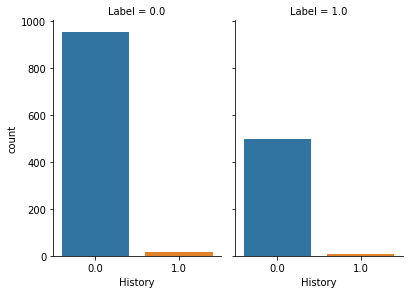

In [161]:
g = sns.catplot(x="History", col="Label",
                data=dfEncode, kind="count",
                height=4, aspect=.7);

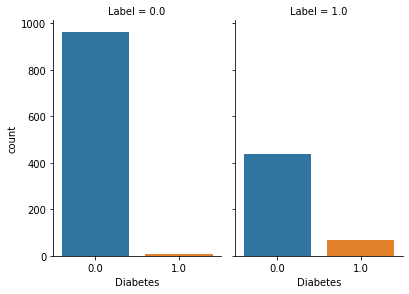

In [162]:
g = sns.catplot(x="Diabetes", col="Label",
                data=dfEncode, kind="count",
                height=4, aspect=.7);

The History and Diabetes columns both have a very low variance suggesting the values are mainly of one type. If we create a graph to show this we can see that Diabetes does have some effect on whether a patient is at risk or not. Wheras the History column has so little variance it almost makes no difference to the outcome. Using this evidence we can remove the History columm to reduce the search space somewhat.

In [163]:
#*Drop History column for all data sets
dfCopy = dfCopy.drop(['History'], axis=1)
dfDrop = dfDrop.drop(['History'], axis=1)
dfEncode = dfEncode.drop(['History'], axis=1)
dfMode = dfMode.drop(['History'], axis=1)

dfCopy.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,IPSI,Contra,Label
0,CVA,yes,yes,yes,yes,89,100,Risk
1,CVA,no,no,no,no,67,100,NoRisk
2,CVA,no,yes,yes,no,79,20,NoRisk
3,A-F,no,yes,no,no,69,40,NoRisk
4,CVA,no,no,no,no,89,30,NoRisk


Another way we could reduce the number of conbinations would be to create discrete values for the continuous attributes such as IPSI and Contra, this would reduce the problem space signinicantly but these two columns have high correlation to other attributes usggesting they will show some interesting relationships. If I was to create discrete values these relationships could be masked as ther values become generalised.  

Another option is feature aggregation, none of the numerical attributes are closely correlated enough to be merged into one meaning this would not work for this data set. 

## Trends

### Manually fixed null values

In [164]:
#Make a copy of the original data
dfMan = dfCopy.copy()

In [165]:
dfMan.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,IPSI,Contra,Label
0,CVA,yes,yes,yes,yes,89,100,Risk
1,CVA,no,no,no,no,67,100,NoRisk
2,CVA,no,yes,yes,no,79,20,NoRisk
3,A-F,no,yes,no,no,69,40,NoRisk
4,CVA,no,no,no,no,89,30,NoRisk


Now we have cleaned the data and removed any values which would cause problems when trying to find trends, we can begin visualising the data and trying to find patterns

In [166]:
#Encode the data so that we can find correlation between attributes 
#Drop the columns which do not need to be encoded
dfLB = dfMan.drop(['IPSI','Contra'], axis=1)
#Drop the columns which are about to be encoded
#dfMan = dfMan.drop(['Indication','Diabetes','IHD','Hypertension','Arrhythmia','History', 'Label'], axis=1)
dfMan = dfMan.drop(['Indication','Diabetes','IHD','Hypertension','Arrhythmia', 'Label'], axis=1)
#Reference https://stackoverflow.com/questions/54444260/Labelencoder-that-keeps-missing-values-as-nan
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#We use the LabelEncoder to encode the categorical data into something the KNN imputer can use

series_stack = dfLB.stack().astype(str)
Label_encoder = preprocessing.LabelEncoder()
dfLB = pd.Series(
    Label_encoder.fit_transform(series_stack),
    index=series_stack.index
).unstack()

#Add the newly encoded columns back to the main dataframe
dfMan = pd.concat([dfMan, dfLB], axis=1)

dfMan.head()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,Label
0,89,100,2,7,7,7,7,4
1,67,100,2,6,6,6,6,3
2,79,20,2,6,7,7,6,3
3,69,40,0,6,7,6,6,3
4,89,30,2,6,6,6,6,3


In [167]:
dfMan.corr()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,Label
IPSI,1.000000,0.345676,-0.195540,0.178162,0.046992,0.102855,0.403099,0.507427
Contra,0.345676,1.000000,-0.047841,0.182621,0.109402,0.112684,0.501881,0.656480
Indication,-0.195540,-0.047841,1.000000,0.014326,-0.059271,0.039722,-0.206163,-0.221140
Diabetes,0.178162,0.182621,0.014326,1.000000,0.067886,0.161342,0.095634,0.276381
IHD,0.046992,0.109402,-0.059271,0.067886,1.000000,0.136287,0.161610,0.246755
Hypertension,0.102855,0.112684,0.039722,0.161342,0.136287,1.000000,0.297646,0.391376
Arrhythmia,0.403099,0.501881,-0.206163,0.095634,0.161610,0.297646,1.000000,0.707299
Label,0.507427,0.656480,-0.221140,0.276381,0.246755,0.391376,0.707299,1.000000


We can now use the correlation data returned from this pandas command to find trends and patterns within the data. Anything over 0.5 suggests the attributes have some form of correlation with each other. We want to find trends in the data which show a correlation with the Label column, as this column tells us whether the patient is at risk or not and will give us an idea about which columns have the most weighting to whether the patient is at risk or not.

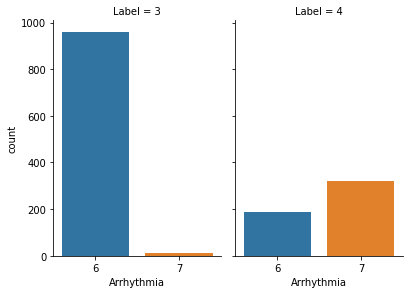

In [168]:
g = sns.catplot(x="Arrhythmia", col="Label",
                data=dfMan, kind="count",
                height=4, aspect=.7);

These graphs show the relationship between whether a person has Arrhythmia and whether they are at risk. We can see that by a large majority if a person isnt at risk they most likely dont have Arrhythmia but on the other hand if a person is at risk they likely to have the condition Arrhythmia.

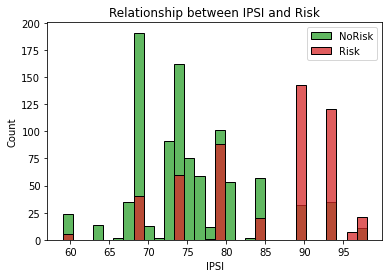

In [169]:
plt.title("Relationship between IPSI and Risk")
sns.histplot(dfCopy[dfCopy['Label'] == 'NoRisk'].IPSI, bins = 30, label = "NoRisk", kde = False, color = "tab:green")
sns.histplot(dfCopy[dfCopy['Label'] == 'Risk'].IPSI, bins = 30, label = "Risk", kde = False, color = "tab:red")
plt.legend()

This graph shows the distribution of IPSI values, the green bars represent if the patient is not at risk and the red is if the patient is at risk. We can see that if a patient has a high percentage of cerebral ischemic lesions they are more likely to be at risk. And vice versa, if they have a lower percentage they are more likely to be not at risk.

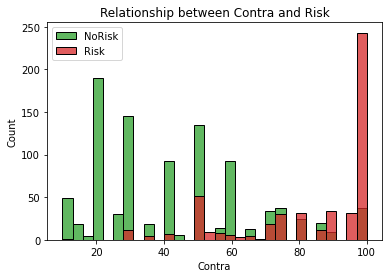

In [170]:
plt.title("Relationship between Contra and Risk")
sns.histplot(dfCopy[dfCopy['Label'] == 'NoRisk'].Contra, bins = 30, label = "NoRisk", kde = False, color = "tab:green")
sns.histplot(dfCopy[dfCopy['Label'] == 'Risk'].Contra, bins = 30, label = "Risk", kde = False, color = "tab:red")
plt.legend()

The graph is showing the distribution of Contra values from 0 to 100%. We can see that if a patient has 100% contralateral cerebral ischemic lesions they are very likely to be at risk, wheras if they have a low percentage of contralateral cerebral ischemic lesions they are likely to not be at risk.

### Alternative handling of null values

In [171]:
dfDropped = dfDrop.copy()
#Encode the data so that we can find correlation between attributes 
#Drop the columns which do not need to be encoded
dfLB = dfDropped.drop(['IPSI','Contra'], axis=1)
#Drop the columns which are about to be encoded
#dfDropped = dfDropped.drop(['Indication','Diabetes','IHD','Hypertension','Arrhythmia','History', 'Label'], axis=1)
dfDropped = dfDropped.drop(['Indication','Diabetes','IHD','Hypertension','Arrhythmia', 'Label'], axis=1)

#Reference https://stackoverflow.com/questions/54444260/Labelencoder-that-keeps-missing-values-as-nan
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#We use the LabelEncoder to encode the categorical data into something the KNN imputer can use

series_stack = dfLB.stack().astype(str)
Label_encoder = preprocessing.LabelEncoder()
dfLB = pd.Series(
    Label_encoder.fit_transform(series_stack),
    index=series_stack.index
).unstack()

#Add the newly encoded columns back to the main dataframe
dfDropped = pd.concat([dfDropped, dfLB], axis=1)

dfDropped.head()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,Label
0,89,100,2,7,7,7,7,4
1,67,100,2,6,6,6,6,3
2,79,20,2,6,7,7,6,3
3,69,40,0,6,7,6,6,3
4,89,30,2,6,6,6,6,3


Text(0.5, 1.0, 'Mode null data')

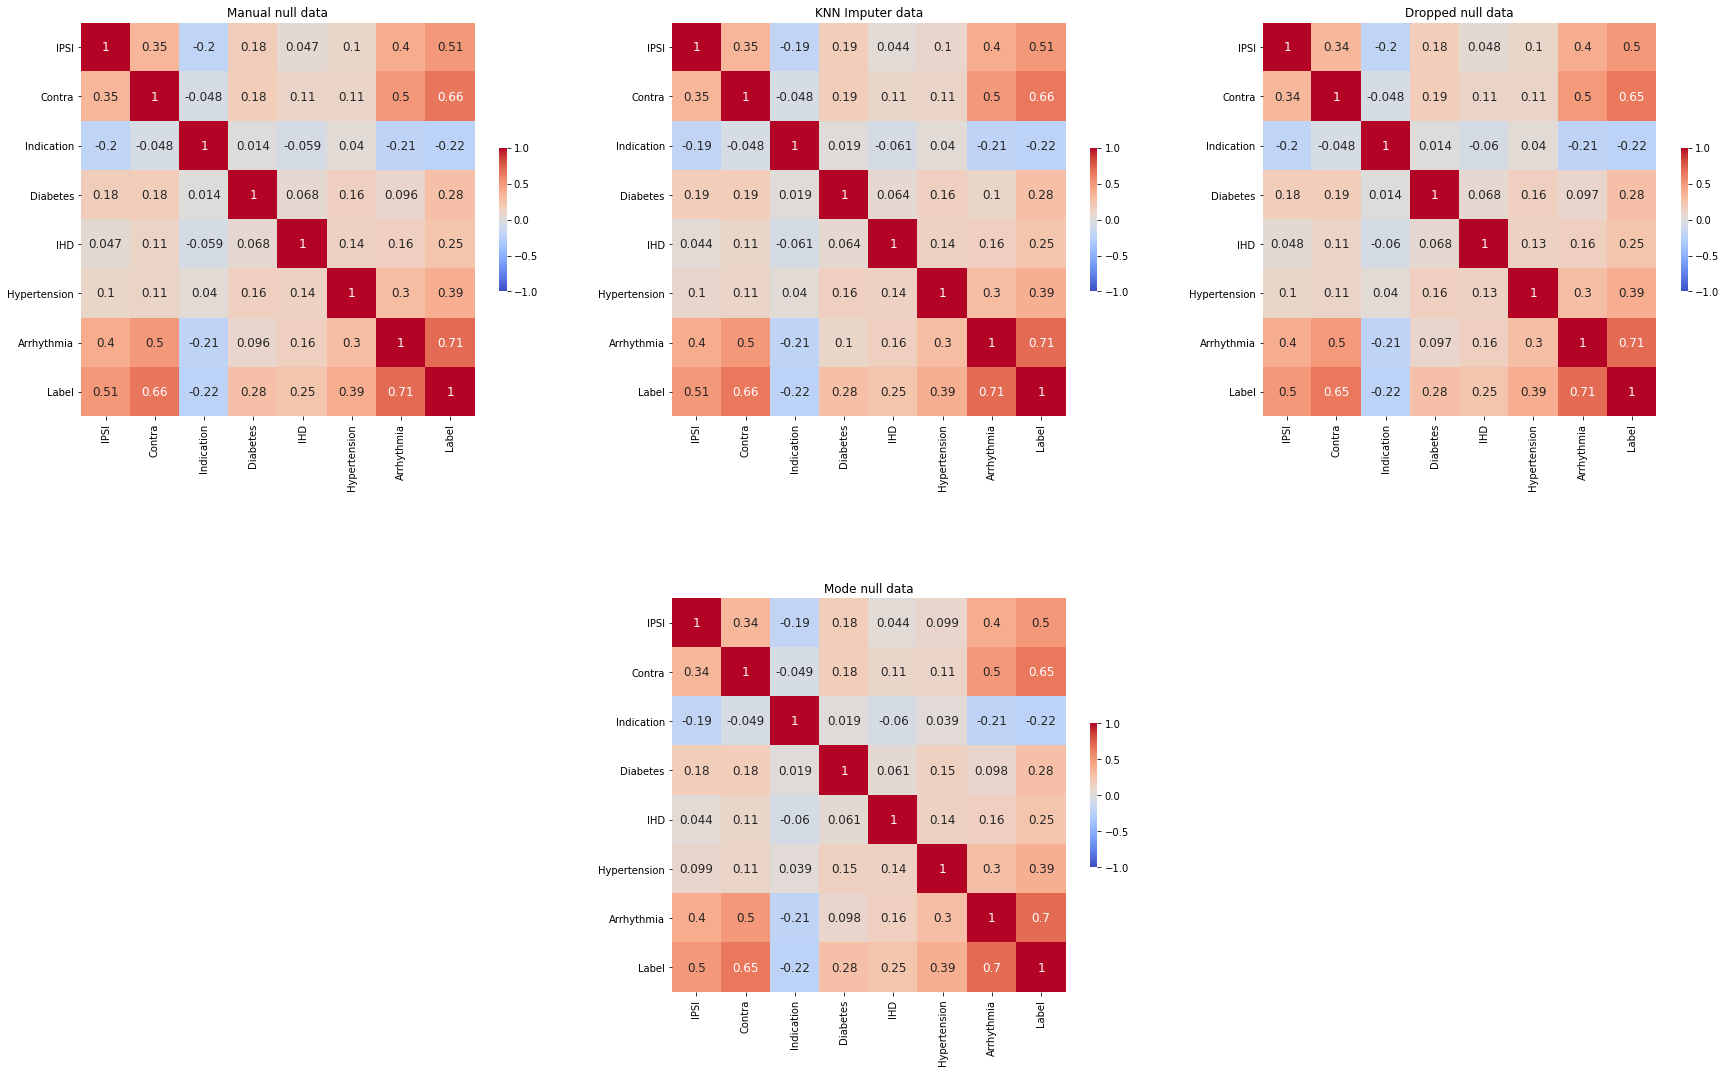

In [172]:
#Reference https://stackoverflow.com/questions/51129404/python-how-to-plot-multiple-seaborn-heatmaps-side-by-side/51129428
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (30,30)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 5)

# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=dfMan.corr(), ax=ax1, cmap='coolwarm',vmin=-1 ,square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=dfEncode.corr(), ax=ax2, cmap='coolwarm',vmin=-1 ,square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=dfDropped.corr(), ax=ax3, cmap='coolwarm',vmin=-1 ,square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=dfMode.corr(), ax=ax4, cmap='coolwarm',vmin=-1 ,square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})

ax1.set_title('Manual null data')
ax2.set_title('KNN Imputer data')
ax3.set_title('Dropped null data')
ax4.set_title('Mode null data')


These heatmaps represent each data set with their null values fixed, each has been fixed in a slightly different way. The heatmap shows the correlation between each attribute within the dataset. I am comparing them to show how similar the data in each set of data is and because of this the trends found in the manually fixed data will be relevant for the other 3 sets of data. 

The only set of data with differing values is the one which used the MODE of each attribute to fill in missing data, this shows that this way of fixing the data is most likely not very accurate as the other 3 heatmaps are more similar. Due to this I will not be using the MODE data fro mthis point on.

# Modeling and Evaluation
To model my data I first need to split the data into the source values and the target values, this data can then be fed into the model to create a prediction model for the target values. Before I can feed the data into the model I first need to split it into training and testing data, this is because I cannot give the model all of the data to start out with otherwise we have nothing to evaluate the predictions against. 



In [173]:
#Create a map of target names and feature names
target_names =  ['Risk', 'NoRisk']
featurenames =  ['IPSI',
  'Contra',
  'Indication',
  'Diabetes',
  'IHD',
  'Hypertension',
  'Arrhythmia']

## Compare null value methods

I fixed the null values in 4 different ways, to evaluate if it made a difference to the model I split the data and train the model 1000 seperate times for each set of of data. Each time I train the model I will record the model accuracy and then I will compare each of the data sets to find out which one is the best quality.

### Manually fixed null values

In [174]:
dfSplit = dfMan.copy() 

#Isolate the training and target data
targetvar = dfSplit.drop(['IPSI','Contra','Indication','Diabetes','IHD', 'Hypertension', 'Arrhythmia'], axis=1)
sourcevars = dfSplit.drop(['Label'], axis=1)

scoresMan = [None] * 1000
for x in range(1000):
    #Split the two data sets 70:30 # Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    trainx, testx, trainy , testy = sklearn.model_selection.train_test_split(sourcevars,targetvar ,train_size = 0.7, shuffle = True)

    #Reference https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
    # Make a new model and fit the data
    model = DecisionTreeClassifier() 
    model = model.fit(
        X=trainx,
        y=trainy) 

    
   
    scoresMan[x] = model.score(testx,testy)

#Use the last set of test data to predict the target data using the model
predy = model.predict( testx )

#Convert the data set Labels into strings so that they are easily read in the confusion matrix
cleanup_nums = {"Label":     {4: "Risk", 3: "NoRisk"}}
testyMan = testy.replace(cleanup_nums)
predyMan = np.where(predy==3, "NoRisk", "Risk")
#scoresMan   

### KNN Imputer

In [175]:
dfSplit = dfEncode.copy()

#Isolate the training and target data
targetvar = dfSplit.drop(['IPSI','Contra','Indication','Diabetes','IHD', 'Hypertension', 'Arrhythmia'], axis=1)
sourcevars = dfSplit.drop(['Label'], axis=1)
scoresKNN = [None] * 1000
for x in range(1000):
    
    #Split the two data sets 70:30 # Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    trainx, testx, trainy , testy = sklearn.model_selection.train_test_split(sourcevars,targetvar ,train_size = 0.7, shuffle = True)

    #Reference https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
    # Make a new model and fit the data
    model = DecisionTreeClassifier() 
    model = model.fit(
        X=trainx,
        y=trainy) 

   
    
    scoresKNN[x] = model.score(testx,testy)
    
#Use the last set of test data to predict the target data using the model
predy = model.predict( testx )

#Convert the data set Labels into strings so that they are easily read in the confusion matrix
cleanup_nums = {"Label":     {1: "Risk", 0: "NoRisk"}}
testyKNN = testy.replace(cleanup_nums)
predyKNN = np.where(predy==0, "NoRisk", "Risk")

### Remove Null

In [176]:
dfSplit = dfDropped.copy()

#Isolate the training and target data
targetvar = dfSplit.drop(['IPSI','Contra','Indication','Diabetes','IHD', 'Hypertension', 'Arrhythmia'], axis=1)
sourcevars = dfSplit.drop(['Label'], axis=1)

scoresRemove = [None] * 1000
for x in range(1000):

    #Split the two data sets 70:30 # Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    trainx, testx, trainy , testy = sklearn.model_selection.train_test_split(sourcevars,targetvar ,train_size = 0.7, shuffle = True)

    #Reference https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
    # Make a new model and fit the data
    model = DecisionTreeClassifier() 
    model = model.fit(
        X=trainx,
        y=trainy) 

   
    
    scoresRemove[x] = model.score(testx,testy)
    
#Use the last set of test data to predict the target data using the model
predy = model.predict( testx )

#Convert the data set Labels into strings so that they are easily read in the confusion matrix
cleanup_nums = {"Label":     {4: "Risk", 3: "NoRisk"}}
testyRemove = testy.replace(cleanup_nums)
predyRemove = np.where(predy==3, "NoRisk", "Risk")

### Mode

In [177]:
dfSplit = dfMode.copy()

#Isolate the training and target data
targetvar = dfSplit.drop(['IPSI','Contra','Indication','Diabetes','IHD', 'Hypertension', 'Arrhythmia'], axis=1)
sourcevars = dfSplit.drop(['Label'], axis=1)

scoresMode = [None] * 1000
for x in range(1000):

    #Split the two data sets 70:30 # Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    trainx, testx, trainy , testy = sklearn.model_selection.train_test_split(sourcevars,targetvar ,train_size = 0.7, shuffle = True)

    #Reference https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
    # Make a new model and fit the data
    model = DecisionTreeClassifier() 
    model = model.fit(
        X=trainx,
        y=trainy) 

    
    
    scoresMode[x] = model.score(testx,testy)
    
#Use the last set of test data to predict the target data using the model
predy = model.predict( testx )

#Convert the data set Labels into strings so that they are easily read in the confusion matrix
cleanup_nums = {"Label":     {1: "Risk", 0: "NoRisk"}}
testyMode = testy.replace(cleanup_nums)
predyMode = np.where(predy==0, "NoRisk", "Risk")

### Comparison

Text(0.5, 0.98, 'Histograms with KDE')

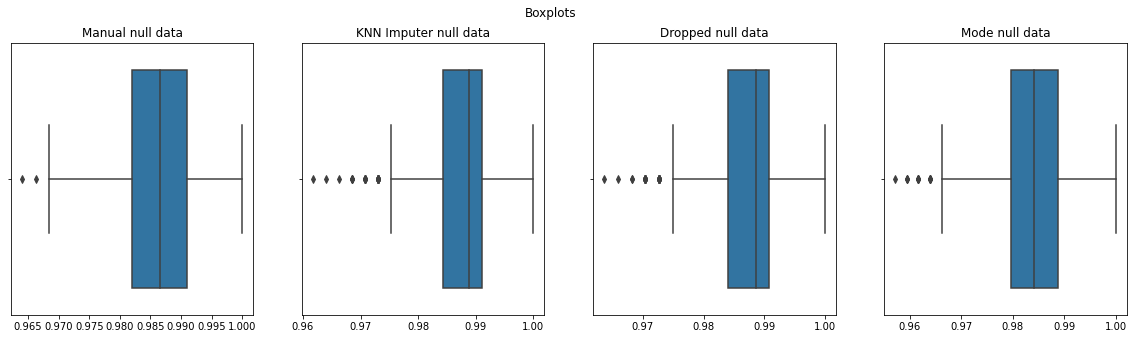

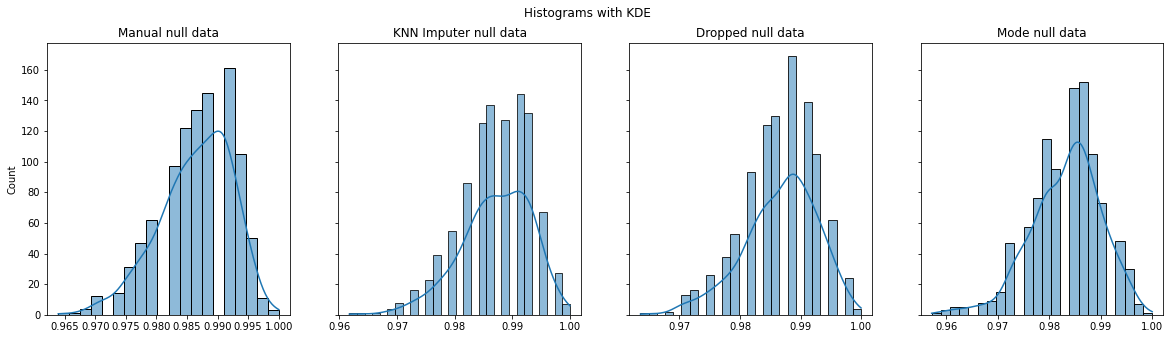

In [178]:
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

sns.boxplot(x=scoresMan, ax=axes[0]).set_title("Manual null data")
sns.boxplot(x=scoresKNN, ax=axes[1]).set_title("KNN Imputer null data")
sns.boxplot(x=scoresRemove, ax=axes[2]).set_title("Dropped null data")
sns.boxplot(x=scoresMode, ax=axes[3]).set_title("Mode null data")
plt.savefig('nullValueComparisonBox.png',format='png')
plt.suptitle("Boxplots")
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

sns.histplot(x=scoresMan, kde = True, ax=axes[0]).set_title("Manual null data")
sns.histplot(x=scoresKNN, kde = True,ax=axes[1]).set_title("KNN Imputer null data")
sns.histplot(x=scoresRemove, kde = True,ax=axes[2]).set_title("Dropped null data")
sns.histplot(x=scoresMode, kde = True,ax=axes[3]).set_title("Mode null data")
plt.savefig('nullValueComparisonHist.png',format='png')
plt.suptitle("Histograms with KDE")

In [179]:
print(f"Mean for the manually fixed data: {meanFunc(scoresMan)}")
print(f"Standard deviation for the KNN Imputer fixed data: {meanFunc(scoresKNN)}")
print(f"Standard deviation for the removed fixed data: {meanFunc(scoresRemove)}")
print(f"Standard deviation for the Mode fixed data: {meanFunc(scoresMode)}")

Mean for the manually fixed data: 0.9864662162162162
Standard deviation for the KNN Imputer fixed data: 0.9871824324324325
Standard deviation for the removed fixed data: 0.9867448747152621
Standard deviation for the Mode fixed data: 0.9833310810810811


In [180]:
print(f"Standard deviation for the manually fixed data: {std(scoresMan)}")
print(f"Standard deviation for the KNN Imputer fixed data: {std(scoresKNN)}")
print(f"Standard deviation for the removed fixed data: {std(scoresRemove)}")
print(f"Standard deviation for the Mode fixed data: {std(scoresMode)}")

Standard deviation for the manually fixed data: 0.005976290556782635
Standard deviation for the KNN Imputer fixed data: 0.006161266052935117
Standard deviation for the removed fixed data: 0.006080869336863736
Standard deviation for the Mode fixed data: 0.006800981022609673


If we use the above diagrams we can see that there is little difference between the 4 sets of data. Using the box plots we can see the data has a small spread and a toght distrobution for each data set. We see a similar situation with the histograms, the values are mainly grouped within the same region accross all of the different methods for fixing the null values. The mean and standard deviation values show a similar story with each data set being very similar to each other.

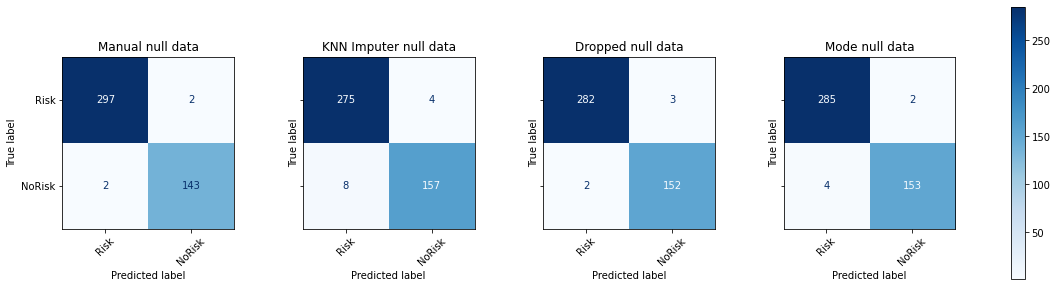

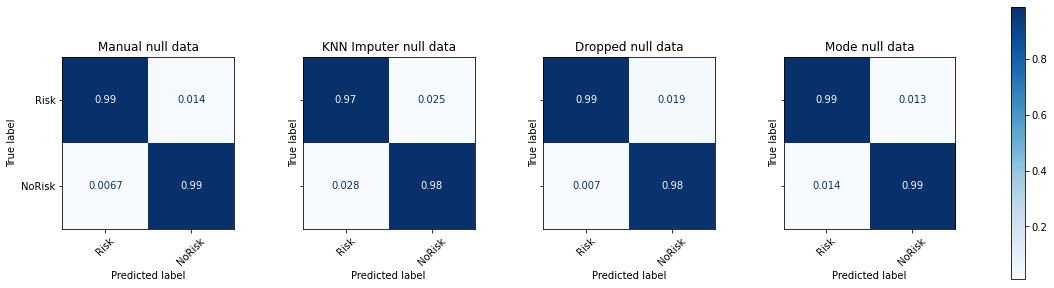

In [181]:
#Reference https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

cf_matrix = confusion_matrix(testyMan, predyMan)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[0], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Manual null data")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(testyKNN, predyKNN)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[1], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("KNN Imputer null data")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(testyRemove, predyRemove)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[2], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Dropped null data")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(testyMode, predyMode)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[3], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Mode null data")
disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

cf_matrix = confusion_matrix(testyMan, predyMan, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[0], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Manual null data")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(testyKNN, predyKNN, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[1], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("KNN Imputer null data")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(testyRemove, predyRemove, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[2], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Dropped null data")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(testyMode, predyMode, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[3], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Mode null data")
disp.im_.colorbar.remove()


plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)

plt.show()

In [182]:
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

print("Manual Null data Confusion matrix metrics")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(testyMan,predyMan):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(testyMan, predyMan).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")


print("Knn Imputer Null data Confusion matrix metrics")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(testyKNN,predyKNN):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(testyKNN, predyKNN).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")

print("Removed Null data Confusion matrix metrics")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(testyRemove,predyRemove):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(testyRemove, predyRemove).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")

print("Mode Null data Confusion matrix metrics")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(testyMode,predyMode):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(testyMode, predyMode).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")

Manual Null data Confusion matrix metrics
The Accuracy of the confusion matrix is: 0.990991
The Sensitivity of the confusion matrix is: 0.986207
The Specificity of the confusion matrix is: 0.993311
The Precision of the confusion matrix is: 0.986207
Knn Imputer Null data Confusion matrix metrics
The Accuracy of the confusion matrix is: 0.972973
The Sensitivity of the confusion matrix is: 0.951515
The Specificity of the confusion matrix is: 0.985663
The Precision of the confusion matrix is: 0.975155
Removed Null data Confusion matrix metrics
The Accuracy of the confusion matrix is: 0.988610
The Sensitivity of the confusion matrix is: 0.987013
The Specificity of the confusion matrix is: 0.989474
The Precision of the confusion matrix is: 0.980645
Mode Null data Confusion matrix metrics
The Accuracy of the confusion matrix is: 0.986486
The Sensitivity of the confusion matrix is: 0.974522
The Specificity of the confusion matrix is: 0.993031
The Precision of the confusion matrix is: 0.987097


Here we have standard confusion matrix and normalised versions of each showing the last data set produced by the previous code. We can see that all of the data sets fall within a fairly tight margin of each other. The metrics of the confusion matric reiterate this and we can see that each set of data produces very similar predictions.

This tells me that the number of null values within the data was negligible and any of the sets of data would be suitable for the task.

I have chosen to go with the the null values I fixed by hand.

## Split, Model and Evaluate data

In [183]:
dfCopy.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,IPSI,Contra,Label
0,CVA,yes,yes,yes,yes,89,100,Risk
1,CVA,no,no,no,no,67,100,NoRisk
2,CVA,no,yes,yes,no,79,20,NoRisk
3,A-F,no,yes,no,no,69,40,NoRisk
4,CVA,no,no,no,no,89,30,NoRisk


In [184]:
dfMan.head()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,Label
0,89,100,2,7,7,7,7,4
1,67,100,2,6,6,6,6,3
2,79,20,2,6,7,7,6,3
3,69,40,0,6,7,6,6,3
4,89,30,2,6,6,6,6,3


In [185]:
dfSplit = dfMan.copy()

### Normalise data

In [186]:
#Now we normalise the data so that there isnt a bias due to larger numbers 
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
dfSplit = pd.DataFrame(scaler.fit_transform(dfSplit), columns = dfSplit.columns)
dfSplit.head()

,IPSI,Contra,Indication,Diabetes,IHD,Hypertension,Arrhythmia,Label
0,0.769231,1.000000,0.4,1.0,1.0,1.0,1.0,1.0
1,0.205128,1.000000,0.4,0.0,0.0,0.0,0.0,0.0
2,0.512821,0.111111,0.4,0.0,1.0,1.0,0.0,0.0
3,0.256410,0.333333,0.0,0.0,1.0,0.0,0.0,0.0
4,0.769231,0.222222,0.4,0.0,0.0,0.0,0.0,0.0


### Split the data

In [187]:
#Isolate the training and target data
targetvar = dfSplit.drop(['IPSI','Contra','Indication','Diabetes','IHD', 'Hypertension', 'Arrhythmia'], axis=1)
sourcevars = dfSplit.drop(['Label'], axis=1)

In [188]:
#Split the two data sets 70:30 # Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
trainx, testx, trainy , testy = sklearn.model_selection.train_test_split(sourcevars,targetvar ,train_size = 0.7, shuffle = True)

In [189]:
print(f"trainx shape: {trainx.shape} and trainy shape {trainy.shape}")

trainx shape: (1033, 7) and trainy shape (1033, 1)


In [190]:
print(f"testx shape: {testx.shape} and testy shape {testy.shape}")

testx shape: (444, 7) and testy shape (444, 1)


### Train the models

I have decided to compare two different classifier models to predict whether a patient is at risk or not.

The first is a Decision Tree, Decision Trees allow me to use multiple inputs to predict my single output variable. Decision trees also accept categorical and numerical data which is perfect for the data set I am using. Decision trees take multiple attributes and creates rules which break the large data set down into classifcations, eventually the data set is broken down small enough and the tree can be used to predict outputs. Decision trees are easy to validate using statistical methods as well as working well with large data sets. 

I will also compare Decision Trees against the Random Forest classifier, random forest uses the decision tree algorithm and runs it multiple times with different subsets of the available training data. The random forest then combines the output of the individual trees to generate an output. Random forest works to combat overfitting which can happen with decision trees. 

I have compared these two similar classifiers and made a decision as to which one I will compare with the MLP classifier. 


The second is a Multi-layer Perceptron classifier (MLP), this model similar to the Decision tree takes multiple input and uses them to predict a single output attribute. MLP classifiers also accept numerical and categorical data. This model optimizes the log-loss function using stochastic gradient descent. 

### Decision Tree

The Decision Tree took: 0.0028 seconds to train


<Figure size 432x288 with 0 Axes>

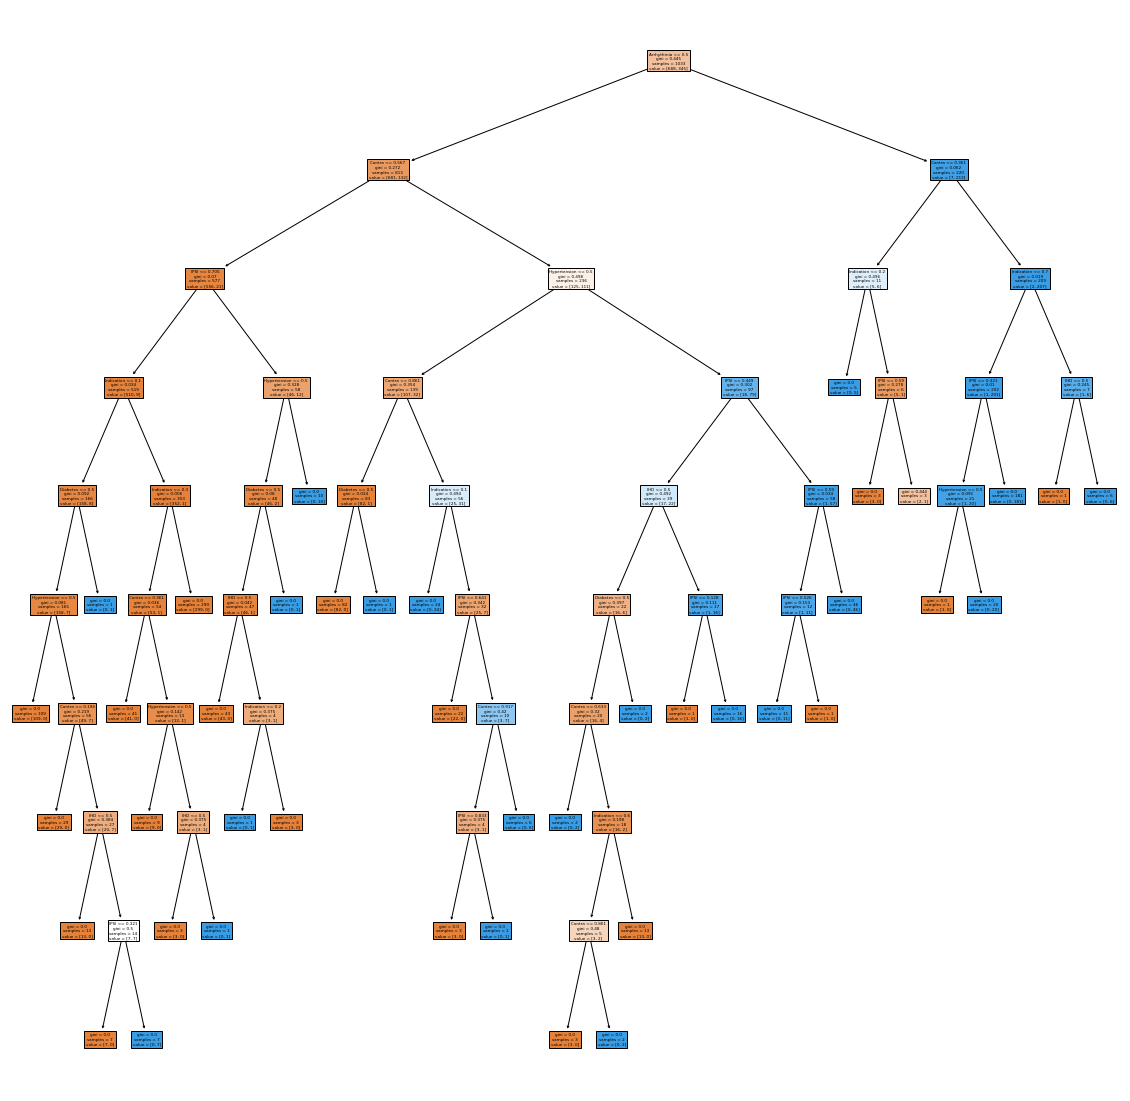

In [191]:
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Make a new model and fit the data
first = time.perf_counter()
model = DecisionTreeClassifier() 
model = model.fit(
    X=trainx,
    y=trainy) 
second = time.perf_counter()
#Plot the decision tree
plt.figure()
fig = plt.figure(figsize = (20,20))
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
plot_tree( model, feature_names = featurenames, filled=True)
#Reference https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('TrainTestSplitTree.svg',format='svg')
print(f"The Decision Tree took: {second - first:0.4f} seconds to train")

### Hyper-Paramters Optimisation - Random Forest

In [192]:
#Reshape y values into a 1D array for RandomForest and MLPClassifier
reshapedY = np.array(trainy).ravel()

In [212]:
#Reference https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6
#Use hyper-parameter optimisation to find the parameters with the highest accuracy
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [None, 5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
first = time.perf_counter()
modelForest = RandomForestClassifier() 

gridF = GridSearchCV(modelForest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
#Fit and train the mode lwit hthe training data.
bestF = gridF.fit(trainx, reshapedY)
second = time.perf_counter()
print(f"The Random Forest took: {second - first:0.4f} seconds")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.6min


The MLPClassifer took: 157.5764 seconds


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.6min finished


In [213]:
bestF.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

#### Compare Random Forest and Decision Tree

In [214]:
print(f"The decision tree classifier accuracy using the testing data: {model.score(testx, testy)}")

The decision tree classifier accuracy using the testing data: 0.9864864864864865


In [215]:
print(f"The Random Forest Classifier accuracy using the testing data: {bestF.score(testx, testy)}")

The Random Forest Classifier accuracy using the testing data: 0.990990990990991


We can see that the Random Forest Classifier has a higher accuracy so I have decided to use this model to compare against the MLP classifer.

### Hyper-Paramters Optimisation - MLP Classifier

In [197]:
#Reshape y values into a 1D array
reshapedY = np.array(trainy).ravel()

#Reference https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b
#reference  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
first = time.perf_counter()
modelMLP = MLPClassifier(max_iter=50000)
parameter_space = {
    'hidden_layer_sizes': [(10), (100), (100, 10), (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100)],
    'solver': ['sgd', 'adam'],
    'activation': ['tanh', 'relu', 'logistic']
}

#Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#Hyper-paramters optimisation search
clf = GridSearchCV(modelMLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(trainx, reshapedY) # X is train samples and y is the corresponding labels
second = time.perf_counter()
print(f"The MLPClassifer took: {second - first:0.4f} seconds")

The MLPClassifer took: 91.0065 seconds


In [198]:
# Best paramete set from the hyper-paramters optimisation search
print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.3f for %r" % (mean, params))

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100, 100), 'solver': 'adam'}
0.957 for {'activation': 'tanh', 'hidden_layer_sizes': 10, 'solver': 'sgd'}
0.965 for {'activation': 'tanh', 'hidden_layer_sizes': 10, 'solver': 'adam'}
0.955 for {'activation': 'tanh', 'hidden_layer_sizes': 100, 'solver': 'sgd'}
0.958 for {'activation': 'tanh', 'hidden_layer_sizes': 100, 'solver': 'adam'}
0.963 for {'activation': 'tanh', 'hidden_layer_sizes': (100, 10), 'solver': 'sgd'}
0.963 for {'activation': 'tanh', 'hidden_layer_sizes': (100, 10), 'solver': 'adam'}
0.963 for {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}
0.958 for {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
0.962 for {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}
0.962 for {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}
0.954 for {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 10

This table shows the results from the GridSearchCV, a hyper-parameter optimization tool. We see the mean test score and the parameters used in the test. 

The pattern that we can see is that adding layers and nodes seems to have a postive effect on the accuracy of the model. It also seems adding layers has slightly more of an effect than when we add nodes to an existing layer. Going from 10 nodes to 100, 100, 100, 100 nodes we see a small difference difference, but the performance of the model drops signicantly.

### Compare split data

I have used the decision tree to compare the two methods for splitting data.

In [199]:
print(f"The mean accuracy on the random test split data set: {model.score(testx, testy)}")

The mean accuracy on the random test split data set: 0.9864864864864865


When it comes to splitting the data there are two common methods, the first is using a simple test split, this takes a random sample of a percentage of the data, typically 70% and uses this to train the model, the other 30% is then used to evaluate the predicted values. This method can cause overfitting if the sample of data is too small, this where the model optimises the parameters to the training data, this creates a model which is not very general with a low level of accuracy.

The second option is a K-fold split, we randomly shuffle the data into K number of folds, and then train the model using each fold, evaluating using the K-1 folds. This allows us to use all of the data for training and further more reduces overfitting. 

In [200]:
#K-Fold cross validation Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
kf = KFold(n_splits=10, shuffle=True)
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
scores = cross_val_score(model, sourcevars, targetvar, cv=kf)
print(f"The mean accuracy using K-Fold Cross Validation on the data set is: {scores.mean()}")

The mean accuracy using K-Fold Cross Validation on the data set is: 0.9871391799963227


We can see that using K-Fold Cross Validation for this data set is not required as a simple test split gives us a very similar MEAN value. The data set is large enough that a random 70:30 split gives a large enough spread of values.

### Compare the models

In [217]:
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
print(f"Random Forest: The mean squared error of the training data is {mean_squared_error(trainy, bestF.predict(trainx))} and the mean absolute error of the training data is {mean_absolute_error(trainy, bestF.predict(trainx))}")

Random Forest: The mean squared error of the training data is 0.000968054211035818 and the mean absolute error of the training data is 0.000968054211035818


In [202]:
print(f"Random Forest: The mean squared error of the test data is {mean_squared_error(testy, bestF.predict(testx))} and the mean absolute error of the training data is {mean_absolute_error(testy, bestF.predict(testx))}")

Random Forest: The mean squared error of the test data is 0.013513513513513514 and the mean absolute error of the training data is 0.013513513513513514


In [218]:
print(f"MLP: The mean squared error of the training data is {mean_squared_error(trainy, clf.predict(trainx))} and the mean absolute error of the training data is {mean_absolute_error(trainy, clf.predict(trainx))}")

MLP: The mean squared error of the training data is 0.01452081316553727 and the mean absolute error of the training data is 0.01452081316553727


In [219]:
print(f"MLP: The mean squared error of the test data is {mean_squared_error(testy, clf.predict(testx))} and the mean absolute error of the training data is {mean_absolute_error(testy, clf.predict(testx))}")

MLP: The mean squared error of the test data is 0.018018018018018018 and the mean absolute error of the training data is 0.018018018018018018


For both models, we can compare the mean absolute error and mean squared error of the training data and the test data we see that the test set data has slightly higher values indicating that the model produced isnt perfect. 

We can say that the MLP classifier and Random Forest predict the correct value a similar amount of time using these metrics. We can also use the model to predict some values for the Label and then create Confusion Matrix to evaluate the number of wrong predictions.

In [220]:
#Use the test data to predict the target data using the model
predy = bestF.predict( testx )
predTrainy = bestF.predict( trainx )

In [221]:
#Use the test data to predict the target data using the model
predyMLP = clf.predict(testx)
predyTrainMLP = clf.predict(trainx)

In [222]:
#Convert the data set Labels into strings so that they are easily read in the confusion matrix
cleanup_nums = {"Label":     {1: "Risk", 0: "NoRisk"}}
testyMan = testy.replace(cleanup_nums)
predyMan = np.where(predy==0, "NoRisk", "Risk")
predyMPLMan = np.where(predyMLP==0, "NoRisk", "Risk")

trainyMan = trainy.replace(cleanup_nums)
predTrainMan = np.where(predTrainy ==0, "NoRisk", "Risk")
predTrainMLPMan = np.where(predyTrainMLP ==0, "NoRisk", "Risk")

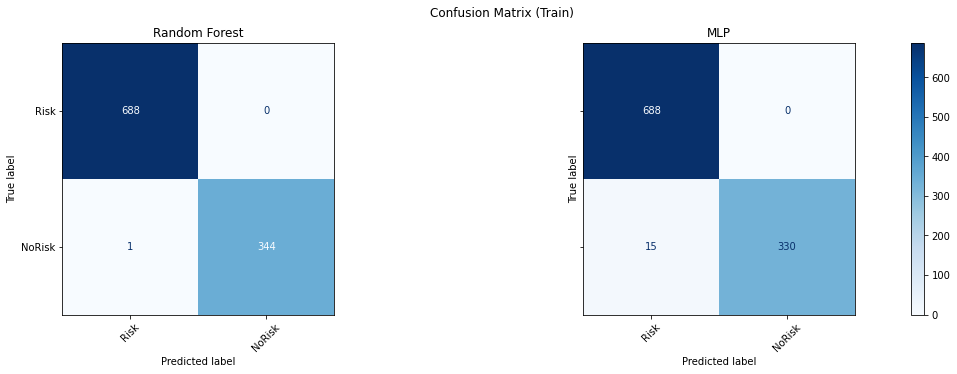

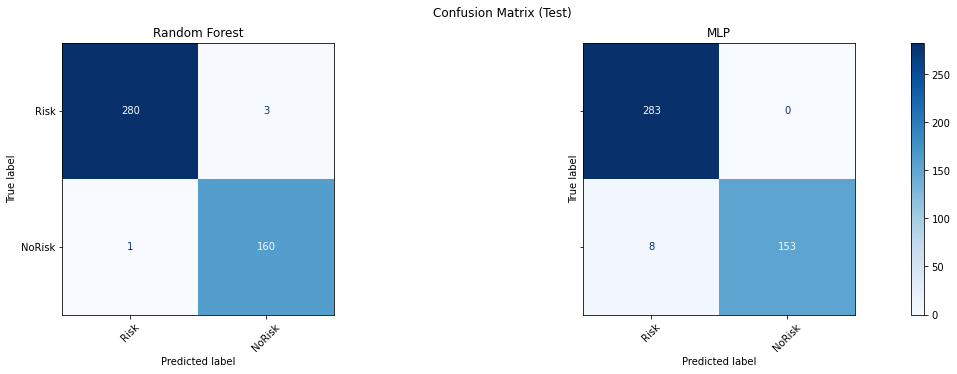

In [223]:
#Reference https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side


f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')

cf_matrix = confusion_matrix(trainyMan, predTrainMan)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[0], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Random Forest")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(trainyMan, predTrainMLPMan)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[1], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("MLP")
disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.suptitle("Confusion Matrix (Train)")
f.colorbar(disp.im_, ax=axes)
plt.show()
#Reference https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')

cf_matrix = confusion_matrix(testyMan, predyMan)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[0], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Random Forest")
disp.im_.colorbar.remove()


cf_matrix = confusion_matrix(testyMan, predyMPLMan)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[1], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("MLP")
disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.suptitle("Confusion Matrix (Test)")
f.colorbar(disp.im_, ax=axes)
plt.show()

In [224]:
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

print("Random Forest Confusion matrix metrics (Train)")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(trainy,predTrainy):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(trainy, predTrainy).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")


print("Random Forest Confusion matrix metrics (Test)")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(testy,predy):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(testy, predy).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")

Random Forest Confusion matrix metrics (Train)
The Accuracy of the confusion matrix is: 0.999032
The Sensitivity of the confusion matrix is: 0.997101
The Specificity of the confusion matrix is: 1.000000
The Precision of the confusion matrix is: 1.000000
Random Forest Confusion matrix metrics (Test)
The Accuracy of the confusion matrix is: 0.990991
The Sensitivity of the confusion matrix is: 0.993789
The Specificity of the confusion matrix is: 0.989399
The Precision of the confusion matrix is: 0.981595


In [225]:
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

print("MLP Confusion matrix metrics (Train)")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(trainy,predyTrainMLP):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(trainy, predyTrainMLP).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")


print("MLP Confusion matrix metrics (Test)")
print(f"The Accuracy of the confusion matrix is: {accuracy_score(testy,predyMLP):0.6f}")
#Reference 
tn, fp, fn, tp = confusion_matrix(testy, predyMLP).ravel()
print(f"The Sensitivity of the confusion matrix is: {(tp/(tp+fn)):0.6f}")
print(f"The Specificity of the confusion matrix is: {(tn/(tn+fp)):0.6f}")
print(f"The Precision of the confusion matrix is: {(tp/(tp+fp)):0.6f}")

MLP Confusion matrix metrics (Train)
The Accuracy of the confusion matrix is: 0.985479
The Sensitivity of the confusion matrix is: 0.956522
The Specificity of the confusion matrix is: 1.000000
The Precision of the confusion matrix is: 1.000000
MLP Confusion matrix metrics (Test)
The Accuracy of the confusion matrix is: 0.981982
The Sensitivity of the confusion matrix is: 0.950311
The Specificity of the confusion matrix is: 1.000000
The Precision of the confusion matrix is: 1.000000


I have calculated some metrics which give some insight into the quality of the models. 

We can see that the accuracy of the Random Forest model is very high, it is nearly 100% meaning our model nearly always correctly classifies items. We can see that the sensitity of the model is also very high, this suggests we predict a patient is at risk and most of the time we are correct. Again the specificity is 100% suggesting when we predict a patient is not at risk we are correct the majority of the time. Precision is also high suggesting out of all of the predictions that a patient is at risk most of them are correct.

The accuracy of the MLP classifier is nearly identical, this suggests it predicts labels correctly at a similar rate. The sensitivity is also slightly lower suggesting when we predict a patient is at risk, it is incorrect more of the time compared with the other model. The specificity is identical suggesting when we predict a patient is not at risk we are correct the same amount of time than with the Random Forest. Precision is also identical suggesting that out of all of the  predicitions that a patient is at risk the same amount of them are correct compared to the Random Forest.


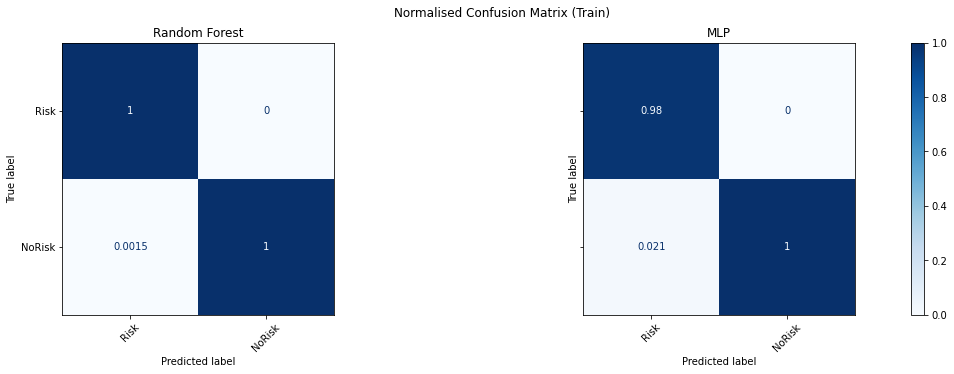

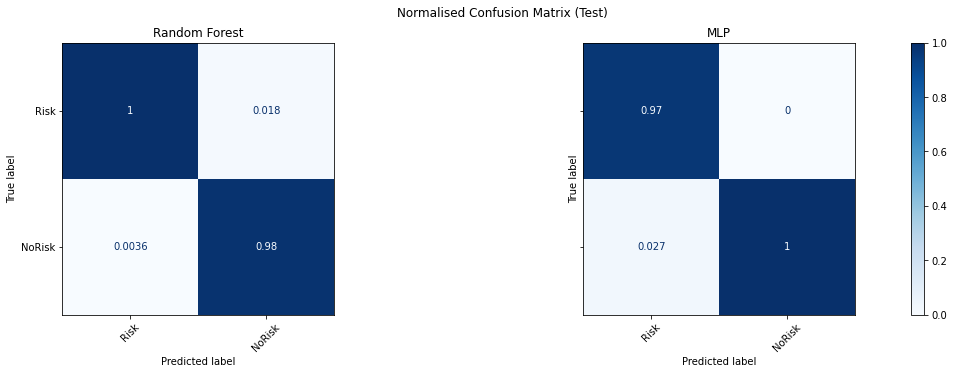

In [226]:
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')

cf_matrix = confusion_matrix(trainyMan, predTrainMan, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[0], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Random Forest")
disp.im_.colorbar.remove()

cf_matrix = confusion_matrix(trainyMan, predTrainMLPMan, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[1], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("MLP")
disp.im_.colorbar.remove()

plt.suptitle("Normalised Confusion Matrix (Train)")

plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)

plt.show()


f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')

cf_matrix = confusion_matrix(testyMan, predyMan, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[0], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("Random Forest")
disp.im_.colorbar.remove()

cf_matrix = confusion_matrix(testyMan, predyMPLMan, normalize = 'pred')
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=target_names)
disp.plot(ax=axes[1], xticks_rotation=45, cmap = 'Blues')
disp.ax_.set_title("MLP")
disp.im_.colorbar.remove()

plt.suptitle("Normalised Confusion Matrix (Test)")

plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)

plt.show()

Looking at the two normalised confusion matrix it confirms what we have already seen, nearly 100% of the time the models produce a similar result to the test data set. All of this data shows that our model has a low level of confusion and a high level of accuracy.